# Middle Fixation analysis (compressed fixations)
## Krajbich 2010 Figures


-----------

## Load fixation and trial information 

In [133]:
data_fix_1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PF2019/Output/fixation_PFA_Collapsed_AllConditions_33.csv') 
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PF2019/Data/DataPerceptualFramingNotebook_v1.csv') 

print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
Number of participants: 33


In [134]:
for i in [31]:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
    data_fix_1 = data_fix_1[(data_fix_1.parcode != i)]

print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33]
Number of participants: 32


In [135]:
data_exp1=data_exp1.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})


In [136]:
par_list = data_fix_1["parcode"].unique()
parInfoList = data_exp1["Part"].unique()
print('Participants names')
print(par_list)
print(parInfoList)

Participants names
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33]


In [137]:
data_fix_1.head()

,parcode,trial,fix_item,fix_time,rt,block
0,1,40,0,232.0,4261.735,LESS
1,1,40,1,1008.0,4261.735,LESS
2,1,40,2,956.0,4261.735,LESS
3,1,40,1,1030.0,4261.735,LESS
4,1,40,2,642.0,4261.735,LESS


## Add missing zScored values

In [138]:
data_exp1["zRVal"] = z_score1(data_exp1,'Part',"RVal")
data_exp1["zLVal"] = z_score1(data_exp1,'Part',"LVal")

data_exp1["zGSF"] = z_score1(data_exp1,'Part',"GSF")
data_exp1["zDDT"] = z_score1(data_exp1,'Part',"DDT")
data_exp1["AbsDDT"] = abs(data_exp1["DDT"])
data_exp1["zAbsDDT"] = z_score1(data_exp1,'Part',"AbsDDT")

data_exp1["TotVal"] = data_exp1['LVal']+ data_exp1['RVal']
data_exp1["zTotVal"] = z_score1(data_exp1,'Part',"TotVal")

data_exp1["ChosenVal"] = data_exp1['RVal']*data_exp1['Choice']+ data_exp1['LVal']*(1-data_exp1['Choice'])
data_exp1["UnchosenVal"] = data_exp1['LVal']*data_exp1['Choice']+ data_exp1['RVal']*(1-data_exp1['Choice'])
data_exp1["zChosenVal"] = z_score1(data_exp1,'Part',"ChosenVal")
data_exp1["zUnchosenVal"] = z_score1(data_exp1,'Part',"UnchosenVal")


## Change the name of the BlockCond

In [139]:
# Change so everything is equal
data_exp1 = data_exp1.replace('NEXTLESS', 'MORE')
data_exp1 = data_exp1.replace('NEXTMORE', 'LESS')
data_exp1['BlockCond'].unique()

# Change so everything is equal
data_exp1 = data_exp1.replace('MORE', 1)
data_exp1 = data_exp1.replace('LESS', 2)
data_exp1['BlockCond'].unique()

array([2, 1])

## Add correct variable

In [140]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.BlockCond[i] == 1:
        if (data_exp1.Choice[i] == 1 and (data_exp1.LVal[i] < data_exp1.RVal[i])) or (data_exp1.Choice[i] == 0 and (data_exp1.LVal[i] > data_exp1.RVal[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.BlockCond[i] == 2:
        if (data_exp1.Choice[i] == 1 and (data_exp1.LVal[i] > data_exp1.RVal[i])) or (data_exp1.Choice[i] == 0 and (data_exp1.LVal[i] < data_exp1.RVal[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["Correct"] = Correct

## Add column with the item with higher value for each trial


In [141]:
data_exp1.columns

Index(['Unnamed: 0', 'Part', 'TrialN', 'PairID', 'LVal', 'RVal', 'Choice',
       'RT', 'Conf', 'ConfRT', 'BlockCond', 'DDT', 'LDwellTime', 'RDwellTime',
       'GSF', 'LastFixat', 'DVal', 'zDVal', 'AbsDVal', 'zAbsDVal', 'zConf',
       'zRT', 'TotVal', 'ChosenVal', 'UnchosenVal', 'Correct', 'zTotVal',
       'zChosenVal', 'zUnchosenVal', 'zGSF', 'zDDT', 'zAbsDDT', 'zValR',
       'zValL', 'ConfSplit', 'GSFSplit', 'DDTSplit', 'BaseCode', 'High', 'Low',
       'zRVal', 'zLVal', 'AbsDDT'],
      dtype='object')

In [142]:
data_exp1["zHighVal"] = data_exp1[["zRVal", "zLVal"]].max(axis=1)
data_exp1["zLowVal"] = data_exp1[["zRVal", "zLVal"]].min(axis=1)

data_exp1['HighValPos'] = np.where((data_exp1['zHighVal'] == data_exp1['zLVal']) , 1, 2)
data_exp1['LowValPos'] = np.where((data_exp1['zLowVal'] == data_exp1['zLVal']) , 1, 2)

## As in Krajbich, remove trials and collapse fixations

If the blank fixations were recorded between fixations on the same item, then those blank fixations were changed to that item. So, for example, a fixation pattern of ‘Left’, ‘Blank’, ‘Left’ would become ‘Left’, ‘Left’, ‘Left’. We look for the target sequence ‘Left’, ‘Blank’, ‘Left’ or ‘Right’, ‘Blank’, ‘Right’

Additionally, reject trials with initial fixations to no item (>40 ms)


In [143]:
# check for each participant and extract trial list

new_data_fix_1 = []

for i in range(len(par_list)):
    data_fix1_part = data_fix_1.loc[ data_fix_1["parcode"] == par_list[i]]  
    trial_list = data_fix1_part["trial"].unique()
    # check for each trial and extract fixations
    for j in trial_list:
            data_fix1_trial = data_fix1_part.loc[ data_fix1_part["trial"] == j]
            data_fix1_trial = data_fix1_trial.reset_index(drop=True)
            fix_list = data_fix1_trial.fix_item.values
            fixlen = len(fix_list)
            # is the sequence long enough to have at least 3 fixations??
            if fixlen > 2:
                    #breakl = 0
                    ii = 0
                    # check across fixations and remove the 0 or 3 fixations that are in between two fixations to the same item
                    while ii < fixlen:
                     #   if breakl >0:
                     #           breakl = breakl-1
                     #           continue
                        if ii<fixlen-2: # check we have not reached the end of the list
                            if fix_list[ii] == 1 and (fix_list[ii+1] == 0 or fix_list[ii+1] == 3) and fix_list[ii+2] == 1: # if we have the target sequence
                                # generate the row in data_fix containing the compressed information for the 3 fixations
                                parcode_og = data_fix1_trial.iloc[ii].parcode
                                trial_og = data_fix1_trial.iloc[ii].trial
                                fix_item_og = data_fix1_trial.iloc[ii].fix_item # we assign the item in the first location (fix_list[ii])
                                fix_time_og = data_fix1_trial.iloc[ii:ii+3].fix_time.sum() # we add the fixation times for the 3 locations 
                                rt_og = data_fix1_trial.iloc[ii].rt
                                block_og = data_fix1_trial.iloc[ii].block
                                
                                new_data_fix_1.append([parcode_og,trial_og,fix_item_og,fix_time_og,rt_og,block_og])
                    #            breakl =2
                                # we jump the next trials in case we already identified them as part of the target sequence
                                ii = ii +2
#
                            elif fix_list[ii] == 2 and (fix_list[ii+1] == 0 or fix_list[ii+1] == 3) and fix_list[ii+2] == 2: # if we have the other target sequence
                                # generate the row in data_fix containing the compressed information for the 3 fixations
                                parcode_og = data_fix1_trial.iloc[ii].parcode
                                trial_og = data_fix1_trial.iloc[ii].trial
                                fix_item_og = data_fix1_trial.iloc[ii].fix_item # we assign the item in the first location (fix_list[ii])
                                fix_time_og = data_fix1_trial.iloc[ii:ii+3].fix_time.sum() # we add the fixation times for the 3 locations 
                                rt_og = data_fix1_trial.iloc[ii].rt
                                block_og = data_fix1_trial.iloc[ii].block
                                
                                new_data_fix_1.append([parcode_og,trial_og,fix_item_og,fix_time_og,rt_og,block_og])
                      #          breakl =2
                                ii = ii +2
                            # if target pattern is not found we copy the identical line
                            else:
                                new_data_fix_1.append(data_fix1_trial.iloc[ii].values)

#
#
                        else : # we copy the entire row as it was for the last fixations in the sequence (i>=fixlen-2)
                            new_data_fix_1.append(data_fix1_trial.iloc[ii].values)

                        ii = ii + 1
            else:
                    for ii in range(fixlen):
                            new_data_fix_1.append(data_fix1_trial.iloc[ii].values)

                    

new_data_fix_1 = pd.DataFrame(new_data_fix_1,columns=['parcode','trial','fix_item','fix_time','rt','block'])
# Replace the old fixations with the new format        
data_fix_1 = new_data_fix_1.copy()

## Extract fixations info

In [144]:
# Areas defined in DataViewer Reports are 
## 1 : Left
## 2 : Right
## 3 : Symbol for block
## 4 : Center space
## Any other area will be indicated as empty


fixations_info = []
firstFix0_times = []
fixations_details = []

for i in range(len(par_list)):
    data_fix1_part = data_fix_1.loc[ data_fix_1["parcode"] == par_list[i]] 
    data_info1_part = data_exp1.loc[ data_exp1["Part"] == parInfoList[i]] 
    
    trial_list = data_fix1_part["trial"].unique()
    for j in range(0,len(trial_list)):
        data_fix1_trial = data_fix1_part.loc[ data_fix1_part["trial"] == trial_list[j]] 
        data_info1_trial = data_info1_part.loc[ data_info1_part["TrialN"] == j+1] 
        trial_fix_list = data_fix1_trial['fix_item'].values
        last_fix_id = trial_fix_list[len(data_fix1_trial)-1]
        
        
        trial_fix_count = np.bincount(trial_fix_list) # the count is in order [0,1,2,3]
        mostPopularFix =  np.argmax(trial_fix_count)
        numMostPopularFix = trial_fix_count[mostPopularFix]  

        if len(trial_fix_list)>1:
            if trial_fix_list[0] == 3 or trial_fix_list[0] == 0:# if we start with central fixation, we check the next fixation as initial
                first_fix_id = trial_fix_list[1]
                first_fix_time = data_fix1_trial['fix_time'].values[1]
            else:
                first_fix_id = trial_fix_list[0]
                first_fix_time =data_fix1_trial['fix_time'].values[0]
        else:
            first_fix_id = np.nan
            first_fix_time = np.nan
        if len(trial_fix_list)>2:    
            if trial_fix_list[1] == 0: #if first fixation is 0 flag it to delete later
                firstFix_0_flag = 1
                firstFix0_times.append(str(first_fix_id) + 'time' + str(first_fix_time) )
            else:
                firstFix_0_flag = 0
            
    
        last_fix_id = trial_fix_list[len(data_fix1_trial)-1]
        last_fix_time = data_fix1_trial['fix_time'].values[len(data_fix1_trial)-1]
        
        total_time = data_fix1_trial['fix_time'].sum()        
        
        
        # second fixation info
        if len(data_fix1_trial)>2:
            if data_fix1_trial.iloc[0].fix_item == 3 or data_fix1_trial.iloc[0].fix_item == 0: # if we start with a fixation at the middle or outside (the latter shouldn't be but we add it just in case)
                if  data_fix1_trial.iloc[2].fix_item == 1 or data_fix1_trial.iloc[2].fix_item == 2:
                    second_fix_time = data_fix1_trial.iloc[2].fix_time # fixation number 2
                    second_fix_id = data_fix1_trial.iloc[2].fix_item
                else:
                    second_fix_time = data_fix1_trial.iloc[3].fix_time # fixation number 2 displaced because we have a zero in that position
                    second_fix_id = data_fix1_trial.iloc[3].fix_item
            else: # if we start with a fixation not to the middle
                if  data_fix1_trial.iloc[1].fix_item != 3 or data_fix1_trial.iloc[1].fix_item != 0:
                    second_fix_time = data_fix1_trial.iloc[1].fix_time # fixation number 2
                    second_fix_id = data_fix1_trial.iloc[1].fix_item
                else:
                    second_fix_time = data_fix1_trial.iloc[2].fix_time # fixation number 2 displaced because we have a zero in that position
                    second_fix_id = data_fix1_trial.iloc[2].fix_item

        else:
            second_fix_time = np.nan
            second_fix_id = np.nan
        
        # Check for non-final fixations info
        
        if len(data_fix1_trial)>2:
                    non_final_fixations = data_fix1_trial.iloc[0:-1] # remove only last fixation of the series
                    # keep only fixations to the items
                    non_final_fixations = non_final_fixations.loc[(non_final_fixations.fix_item == 1) | (non_final_fixations.fix_item == 2)]
                    # extra overall non-final fix time mean
                    non_final_fix_time =non_final_fixations.fix_time.mean() 
                    non_final_fix_ltime = non_final_fixations.loc[ non_final_fixations["fix_item"] == 1].fix_time.sum()
                    non_final_fix_avgltime = non_final_fixations.loc[ non_final_fixations["fix_item"] == 1].fix_time.mean()                     
                    non_final_fix_rtime = non_final_fixations.loc[ non_final_fixations["fix_item"] == 2].fix_time.sum()
                    non_final_fix_avgrtime = non_final_fixations.loc[ non_final_fixations["fix_item"] == 2].fix_time.mean()
                
        else:
                    non_final_fix_time = np.nan
                    non_final_fix_ltime = np.nan
                    non_final_fix_rtime = np.nan
                    non_final_fix_avgltime = np.nan
                    non_final_fix_avgrtime = np.nan
        
        # Check identity of first/last fixation and determine the value 
        
        if first_fix_id == 1: 
            firstFixValue = float(data_info1_trial['LVal'].values)
        elif first_fix_id == 2: 
            firstFixValue = float(data_info1_trial['RVal'].values)
        else:
            firstFixValue = np.nan

        if last_fix_id == 1: 
            lastFixValue = float(data_info1_trial['LVal'].values)
        elif last_fix_id == 2: 
            lastFixValue = float(data_info1_trial['RVal'].values)
        else:
            lastFixValue = np.nan
        
        #Characterize medium fixations
        # Is there any medium fixations?
        fixatNum = len(data_fix1_trial)
        

        if trial_fix_list[0] == 3 or trial_fix_list[0] == 0:
            middleFixNum = len(data_fix1_trial) - 3
        else:
            middleFixNum = len(data_fix1_trial) - 2
            
        # Generate medium    
        if (fixatNum > 3 and (trial_fix_list[0] == 3 or trial_fix_list[0] == 0)) or (fixatNum > 2 and (trial_fix_list[0] != 3 and trial_fix_list[0] != 0)): 
            trialFixListMedium = np.delete(trial_fix_list, -1) # delete last element of the fixation series
            if trial_fix_list[0] == 3 or trial_fix_list[0] == 0:
                trialFixListMedium = np.delete(trialFixListMedium, [0,1]) # delete first two element of the first fixation goes to center or outside
            else:
                trialFixListMedium = np.delete(trialFixListMedium, 0) # delete first element of the fixation series starts with an item
            trialFixListMediumBin = np.bincount(trialFixListMedium.astype(np.int))
            mostPopularFixMed = np.argmax(trialFixListMediumBin)
            numMostPopularFixMed = trialFixListMediumBin[mostPopularFixMed]  
            
        else:
            trialFixListMedium = np.nan
            mostPopularFixMed = np.nan
            numMostPopularFixMed = np.nan
      
        
        # we don't consider as middle fixations the cases where we have only two fixations (i.e. begining and end)
        if (fixatNum > 3 and (trial_fix_list[0] == 3 or trial_fix_list[0] == 0)) or (fixatNum > 2 and (trial_fix_list[0] != 3 or trial_fix_list[0] != 0)):
            middleFixTotTime =  (data_fix1_trial['fix_time'].sum() - last_fix_time - first_fix_time)       
            #middleFixTimeAvg = middleFixTotTime / middleFixNum
            #if middleFixTimeAvg < 0:
            #    print (str(data_fix1_trial['fix_time'].sum()) + 'last'+ str(last_fix_time) + 'first' + str(first_fix_time))
            #    print(data_fix1_trial['fix_time'])
           # get medium fixations times
            if trial_fix_list[0] == 3 or trial_fix_list[0] == 0:
                data_fix1_trial_aux = data_fix1_trial.iloc[2:len(data_fix1_trial)-1] # drop first and last fixations (since it starts with center fixation we drop the second too) 
            else:
                data_fix1_trial_aux = data_fix1_trial.iloc[1:len(data_fix1_trial)-1] # drop first and last fixations (since it starts with center fixation we drop the second too) 
            
            middleFixTimeAvg = data_fix1_trial_aux.fix_time.mean()
            middlefix_ltime = np.sum(data_fix1_trial_aux.loc[ data_fix1_trial_aux["fix_item"] == 1].fix_time.values)
            middlefix_rtime = np.sum(data_fix1_trial_aux.loc[ data_fix1_trial_aux["fix_item"] == 2].fix_time.values)
            middlefix_avgltime = np.nanmean(data_fix1_trial_aux.loc[ data_fix1_trial_aux["fix_item"] == 1].fix_time.values)
            middlefix_avgrtime = np.nanmean(data_fix1_trial_aux.loc[ data_fix1_trial_aux["fix_item"] == 2].fix_time.values)

            middlefix_ddt = middlefix_rtime - middlefix_ltime
            
            # generate dataframe only with medium fixations
            
            dataFixMedium = data_fix1_trial_aux.copy()
            for jj in range(len(dataFixMedium)):
                trial_mid = dataFixMedium.iloc[jj].trial
                part_mid = dataFixMedium.iloc[jj].parcode
                itemFix_mid = dataFixMedium.iloc[jj].fix_item
                fixTime_mid = dataFixMedium.iloc[jj].fix_time
                block_mid = dataFixMedium.iloc[jj].block
                if itemFix_mid == 1: # if item is left
                    valueFix_mid = float(data_info1_trial['LVal'].values)
                    # fixated - fixated item
                    DValFix_mid = float(data_info1_trial['LVal'].values) - \
                                  float(data_info1_trial['RVal'].values)
                elif itemFix_mid == 2: # if item is right
                    valueFix_mid = float(data_info1_trial['RVal'].values)
                    # fixated - fixated item
                    DValFix_mid = float(data_info1_trial['RVal'].values) -  \
                                  float(data_info1_trial['LVal'].values)
                else: # if no item is being fixated
                    valueFix_mid = np.nan
                    DValFix_mid = np.nan
                fixations_details.append([part_mid,trial_mid,itemFix_mid,fixTime_mid,
                                         block_mid,valueFix_mid,DValFix_mid])
     
        else:
            middleFixTotTime = np.nan
            middleFixTimeAvg = np.nan
            middlefix_ltime = np.nan
            middlefix_rtime = np.nan
            middlefix_avgltime = np.nan
            middlefix_avgrtime = np.nan
            middlefix_ddt = np.nan

              
        fixations_info.append([i,j,first_fix_id , first_fix_time, last_fix_id,last_fix_time, 
                               firstFixValue, lastFixValue, 
                               fixatNum,middleFixNum,mostPopularFix, numMostPopularFix, mostPopularFixMed, numMostPopularFixMed,
                               middleFixTotTime,middleFixTimeAvg,total_time,middlefix_ltime,middlefix_rtime,middlefix_ddt,
                               middlefix_avgltime,middlefix_avgrtime,
                              second_fix_time,second_fix_id,firstFix_0_flag,
                              non_final_fix_time,non_final_fix_ltime,non_final_fix_rtime,non_final_fix_avgltime,non_final_fix_avgrtime]) 


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:153: RuntimeWarning: Mean of empty slice
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:154: RuntimeWarning: Mean of empty slice


In [145]:
fixation_file = pd.DataFrame(fixations_info,columns=['Part','Trial', '1stFixation', '1stFixationTime', 'LastFixation','LastFixationTime', 
                                                     'firstFixValue','lastFixValue', 
                               'fixatNum','middleFixNum','mostPopularFix', 'numMostPopularFix', 'mostPopularFixMed', 'numMostPopularFixMed',
                               'middleFixTime','middleFixTimeAvg','TotalTime','midfix_Ltime','midfix_Rtime','midfix_ddt',
                                                    'midfix_avgLtime','midfix_avgRtime','second_fix_time','second_fix_id','firstFix_0_flag',
                                                   'nff_time','nff_ltime','nff_rtime','nff_avgltime','nff_avgrtime'])

fixations_details_df = pd.DataFrame(fixations_details,columns=['Part','Trial','ItemFix','FixTime','Block','ValFix','DValFix'])

fixation_file = fixation_file.drop(["Part", "Trial"], axis=1)


In [146]:
fixation_file.head()

,1stFixation,1stFixationTime,LastFixation,LastFixationTime,firstFixValue,lastFixValue,fixatNum,middleFixNum,mostPopularFix,numMostPopularFix,...,midfix_avgLtime,midfix_avgRtime,second_fix_time,second_fix_id,firstFix_0_flag,nff_time,nff_ltime,nff_rtime,nff_avgltime,nff_avgrtime
0,1.0,1008.0,1,393.735,110.0,110.0,6,3,1,3,...,1030.0,799.0,956.0,2.0,0,909.0,2038.0,1598.0,1019.0,799.0
1,1.0,706.0,2,912.258,47.0,50.0,5,2,1,2,...,790.0,640.0,640.0,2.0,0,712.0,1496.0,640.0,748.0,640.0
2,1.0,1030.0,2,702.464,50.0,44.0,6,3,0,2,...,384.0,764.0,764.0,2.0,0,726.0,1414.0,764.0,707.0,764.0
3,1.0,1072.0,1,337.751,57.0,57.0,4,1,1,2,...,NaN,796.0,796.0,2.0,0,934.0,1072.0,796.0,1072.0,796.0
4,1.0,1232.0,1,310.342,42.0,42.0,4,1,1,2,...,NaN,654.0,654.0,2.0,0,943.0,1232.0,654.0,1232.0,654.0


In [147]:
data_exp11 = pd.DataFrame()
data_exp1 = data_exp1.reset_index()
fixation_file =fixation_file.reset_index()
frames_list = [data_exp1,fixation_file]
data_exp11 = pd.concat(frames_list, axis = 1)
#fixation_file.to_csv("Output/DataAllFixINcluTEST31.csv",index = False)
# z-score the middle fixations relevant variables

# First Fixations analysis

Since for middle fixations analysis is required to remove trials with no middle fixations we perform analysis for first fixation considering the whole trial dataset (if not strange artifact appears in analysis)

### probability first fixation to high value item


In [43]:
first_fix_2 = [] # create vector to indicate if the 2nd fixation is going to the high or low value


for i in range(len(data_exp11)):
    if data_exp11.iloc[i].LVal > data_exp11.iloc[i].RVal: # if left item is higher value
        if data_exp11.iloc[i]['1stFixation'] == 1 :# if fixation is to the highvalue
            first_fix_2.append(1)
        else:
            first_fix_2.append(0)
    elif data_exp11.iloc[i].LVal < data_exp11.iloc[i].RVal: # if right item is higher value
        if data_exp11.iloc[i]['1stFixation'] == 2 :# if fixation is to the highvalue
            first_fix_2.append(1)
        else:
            first_fix_2.append(0)
    else: # if equal
            first_fix_2.append(0.5)
    if i%500 == 0 :
        print('500 in')


data_exp11['FirstFix2High'] =  first_fix_2

500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in


### generate bin variable according to AbsDVal (difficulty)


In [106]:

bin_num = 5
Dval_bin = pd.to_numeric(pd.qcut(data_exp11["zAbsDVal"].values, bin_num , labels=range(bin_num)))

data_exp11['zAbsDVal_bin'] =  Dval_bin

bin_num = 2
Dval_bin = pd.to_numeric(pd.qcut(data_exp11["zAbsDVal"].values, bin_num , labels=range(bin_num)))

data_exp11['zAbsDVal_bin2'] =  Dval_bin

bin_num = 2
Dval_bin = pd.to_numeric(pd.qcut(data_exp11["zDVal"].values, bin_num , labels=range(bin_num)))

data_exp11['zDVal_bin2'] =  Dval_bin


In [107]:
data_expL = data_exp11.loc[data_exp11['BlockCond'] == 1] # 1 = Like, 2 = Dislike
data_expD = data_exp11.loc[data_exp11['BlockCond'] == 2] # 1 = Like, 2 = Dislike

In [108]:
mean_Lik_MeanHVal2Fix = []
mean_Dis_MeanHVal2Fix = []
for i in data_expL.Part.unique():
    
    Lik_MeanHVal2Fix = data_expL.loc[(data_expL['Part'] == i)]['FirstFix2High'].mean()
    Dis_MeanHVal2Fix = data_expD.loc[(data_expD['Part'] == i)]['FirstFix2High'].mean()
    
    mean_Lik_MeanHVal2Fix.append(Lik_MeanHVal2Fix)
    mean_Dis_MeanHVal2Fix.append(Dis_MeanHVal2Fix)
  

e_LikHVal2Fix  = SE_calc(mean_Lik_MeanHVal2Fix)
e_DisHVal2Fix  = SE_calc(mean_Dis_MeanHVal2Fix)

avg_LikHVal2Fix  = np.mean(mean_Lik_MeanHVal2Fix)
avg_DisHVal2Fix  = np.mean(mean_Dis_MeanHVal2Fix)

# extract times when 2nd fixation goes to high value or low value item
high_Lik_2fixTime = data_expL.loc[(data_expL['FirstFix2High'] == 1)]['1stFixationTime'].values
low_Lik_2fixTime = data_expL.loc[(data_expL['FirstFix2High'] == 0)]['1stFixationTime'].values

high_Dis_2fixTime = data_expD.loc[(data_expD['FirstFix2High'] == 1)]['1stFixationTime'].values
low_Dis_2fixTime = data_expD.loc[(data_expD['FirstFix2High'] == 0)]['1stFixationTime'].values

∆ = -0.0013020833333333703; t =-0.4687573834594764; p = 0.6425228492957304; compared fix:  like-dislike


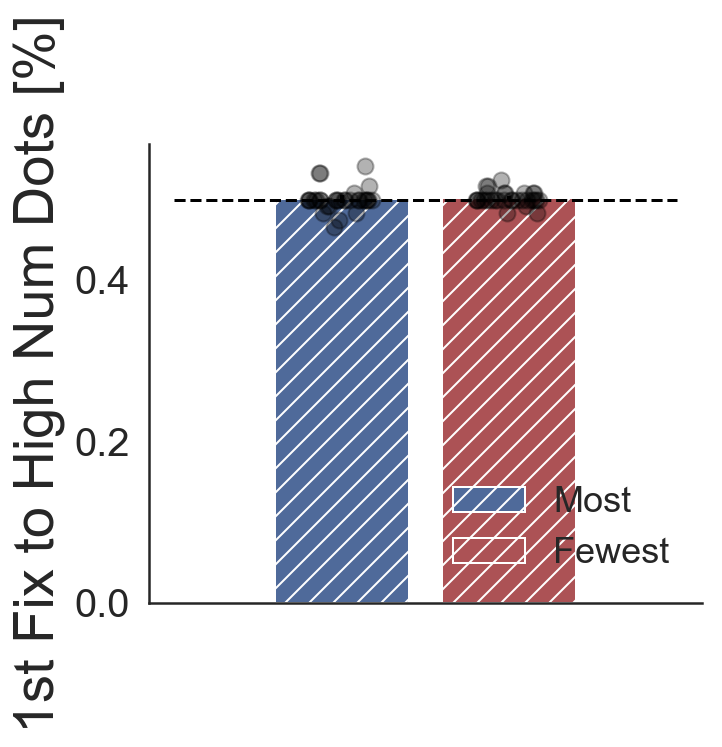

In [109]:
fig = plt.figure(figsize=[6,10])
gs = GridSpec(2,1,bottom=0.18,left=0.18,right=0.82)

ax1 = fig.add_subplot(gs[0,0])

add_star(mean_Lik_MeanHVal2Fix,mean_Dis_MeanHVal2Fix,1,2,'like-dislike')
plt.yticks(fontsize=20)


#ax2 = fig.add_subplot(gs[1,0])

# bars
ax1.bar(1, np.mean(mean_Lik_MeanHVal2Fix), width=0.8,color= '#4F6A9A',hatch=r'//')
ax1.bar(2, np.mean(mean_Dis_MeanHVal2Fix), width=0.8,color='#AC5255',hatch=r'//')

# error
ax1.errorbar(1, np.mean(mean_Lik_MeanHVal2Fix), yerr=e_LikHVal2Fix*1.96, lw=2, color='#000000')
ax1.errorbar(2, np.mean(mean_Dis_MeanHVal2Fix), yerr=e_DisHVal2Fix*1.96, lw=2, color='#000000')

for i in range(1,len(mean_Lik_MeanHVal2Fix)):
        jittr = np.random.uniform(low=-0.2,high=0.2)
        ax1.plot(1+jittr, mean_Lik_MeanHVal2Fix[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax1.plot(2+jittr, mean_Dis_MeanHVal2Fix[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
ax1.set_xticks([1,2])
ax1.set_xticklabels([], rotation=0, fontsize=25)
ax1.set_ylabel('1st Fix to High Num Dots [%]', fontsize=28)
#ax1.set_xticklabels([], rotation=0, fontsize=25)

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'//', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'//', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "lower right",frameon = False)
        

plt.yticks(fontsize=20)
plt.plot([0,3],[0.5,0.5],'--',color = 'black')


sns.despine()


#fig.savefig(str('SavedFigures/BehavGazeMoreLess_31.png'), dpi = 200 )

Most
∆ = -31.559187682455104; t =-1.4932902097188698; p = 0.1354434578122551; compared fix:  low-high
Fewest
∆ = 28.895924842445197; t =1.6598658804176687; p = 0.09702313121247956; compared fix:  low-high


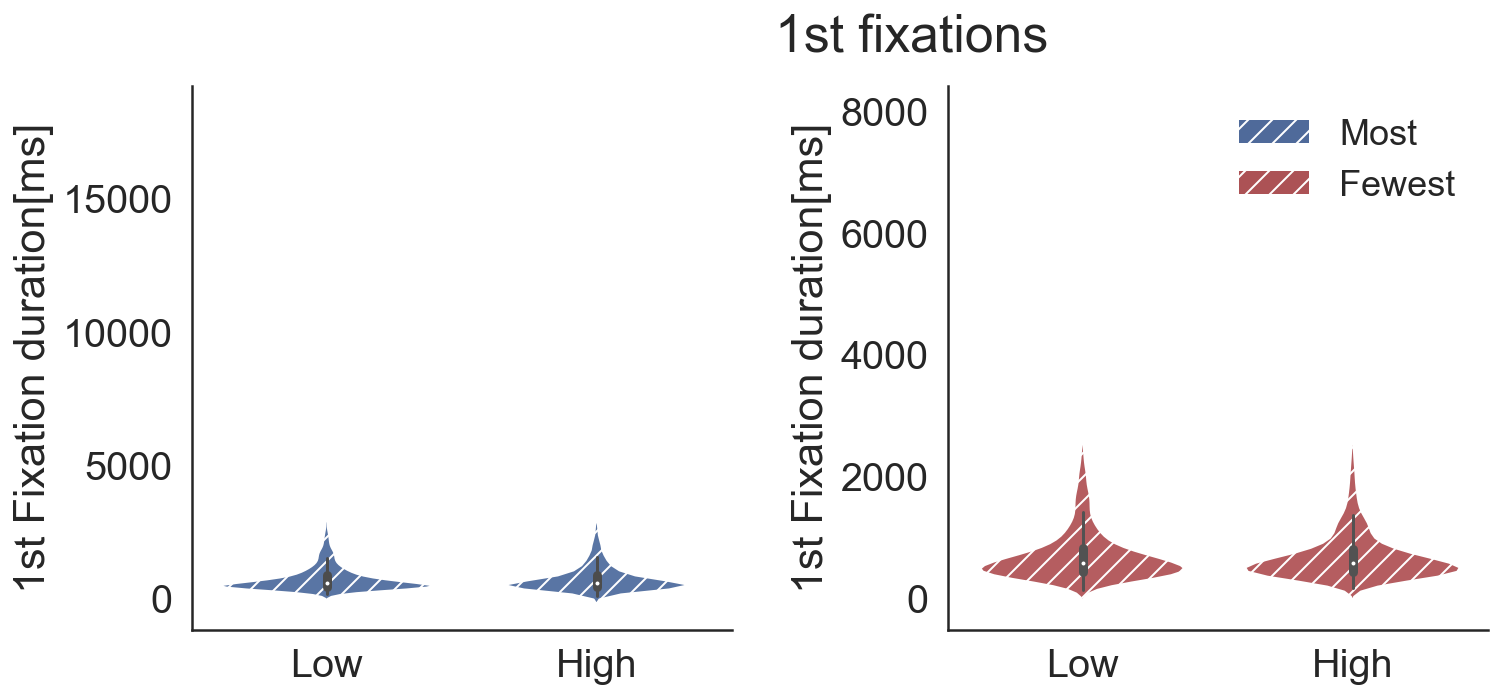

In [110]:
f = plt.figure(figsize=(10,5))
sns.set(style='white', font_scale=1.8)
plt.suptitle('1st fixations')
my_pal = {0 :"b", 1 : "b"}

wspace1 = 0.4
left1 = 0.3 

plt.subplot(121)
print('Most')
all_arr = [low_Lik_2fixTime,
          high_Lik_2fixTime]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='1st Fixation duration[ms]')   
plt.xticks([0, 1,], ['Low', 'High'])
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
add_star_ind(low_Lik_2fixTime, high_Lik_2fixTime,0,1,'low-high')
#plt.ylim(0, 5)

plt.subplots_adjust(left=0, wspace=wspace1)

plt.subplot(122)

my_pal = {0 :"r", 1 : "r"}

print('Fewest')
all_arr = [low_Dis_2fixTime,
          high_Dis_2fixTime]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='1st Fixation duration[ms]')   

plt.xticks([0, 1,], ['Low', 'High'])
#plt.tick_params( axis='y', which='both',bottom=False,top=False,labelbottom=False) 

add_star_ind(low_Dis_2fixTime, high_Dis_2fixTime,0,1,'low-high')

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'//', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'//', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)

sns.despine()


### Define the first fixated item depending on the difference in ratings (Fig 3a, Krajbich,2010)

∆ = -0.0010416666666667185; t =-0.15495932851369723; p = 0.8778579360611436; compared fix:  lowBin - highBin
∆ = 0.002343749999999978; t =0.37218630519810414; p = 0.7122864434825427; compared fix:  lowBin - highBin


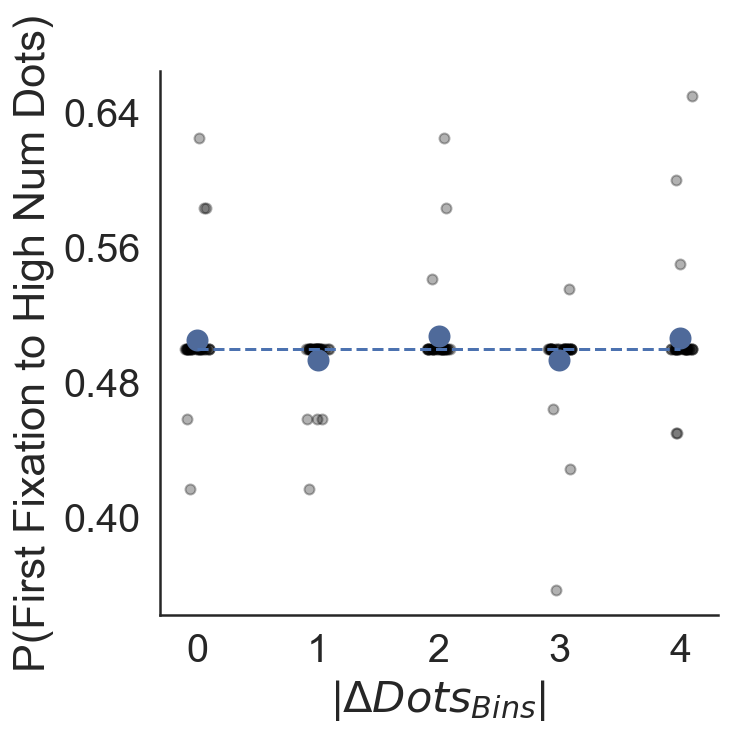

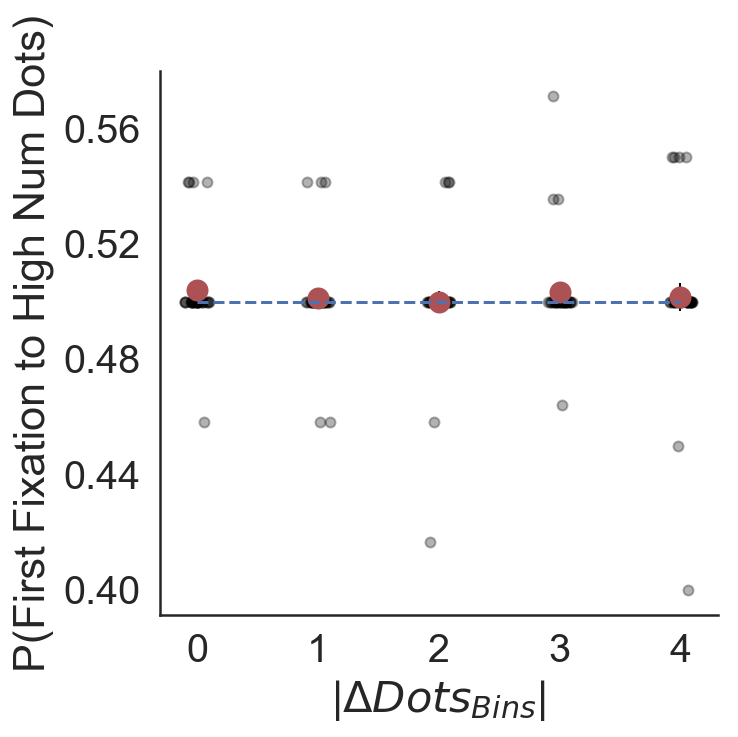

In [111]:
bin_param = 'zAbsDVal_bin'
y_param = 'FirstFix2High'
#y_param = '1stFixation'

y_param_label = 'P(First Fixation to High Num Dots)'
x_param_label = '|$ΔDots_{Bins}$|'
#like
plot_part_bin(data_expL,bin_param, y_param,y_param_label,x_param_label,plot_line=0.5, addstar = 1,colsel ='#4F6A9A')
# dislike
plot_part_bin(data_expD,bin_param, y_param,y_param_label,x_param_label,plot_line=0.5, addstar = 1,colsel ='#AC5255')

## Last fixation results

In [112]:

# Recall that the fixation areas were defined
  ## 1 : Left
  ## 2 : Right


## ---  FOR fewest
data_expD['LastFixChosen'] = np.where(((data_expD['LastFixation'] == 1 ) & (data_expD['Choice'] == 0)) | ((data_expD['LastFixation'] == 2 ) & (data_expD['Choice'] == 1)), 1 , 0)

## ---  FOR most
data_expL['LastFixChosen'] = np.where(((data_expL['LastFixation'] == 1 ) & (data_expL['Choice'] == 0)) | ((data_expL['LastFixation'] == 2 ) & (data_expL['Choice'] == 1)), 1 , 0)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Define the last fixated item as reference for DVal


In [113]:
# for less
Dval_lastFix = []
for i in range(len(data_expD)):
        if (data_expD.LastFixation.values[i]== 2 ): # if last fixations goes to the right option keep DVal
            Dval_lastFix.append(data_expD.DVal.values[i])
        else:
            Dval_lastFix.append(-data_expD.DVal.values[i])

data_expD["DVal_LastFix"] = Dval_lastFix

# for most
Dval_lastFix = []
for i in range(len(data_expL)):
        if (data_expL.LastFixation.values[i]== 2 ): # if last fixations goes to the right option keep DVal
            Dval_lastFix.append(data_expL.DVal.values[i])
        else:
            Dval_lastFix.append(-data_expL.DVal.values[i])

data_expL["DVal_LastFix"] = Dval_lastFix


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


###  Z-score

In [121]:
#Z-scored
data_expD['zDVal_LastFix'] = z_score1(data_expD,'Part',"DVal_LastFix")
data_expL['zDVal_LastFix'] = z_score1(data_expL,'Part',"DVal_LastFix")

# add bins for this
bin_num = 2
Dval_bin = pd.to_numeric(pd.qcut(data_expD["zDVal"].values, bin_num , labels=range(bin_num)))
data_expD['zDVal_LastFix2'] =  Dval_bin
Dval_bin = pd.to_numeric(pd.qcut(data_expL["zDVal"].values, bin_num , labels=range(bin_num)))
data_expL['zDVal_LastFix2'] =  Dval_bin

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pra

Low measure:logit coef = [[0.61879256]] ; Intercept:  [1.98846238]
high measure:logit coef = [[-0.62968976]] ; Intercept:  [2.00740214]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


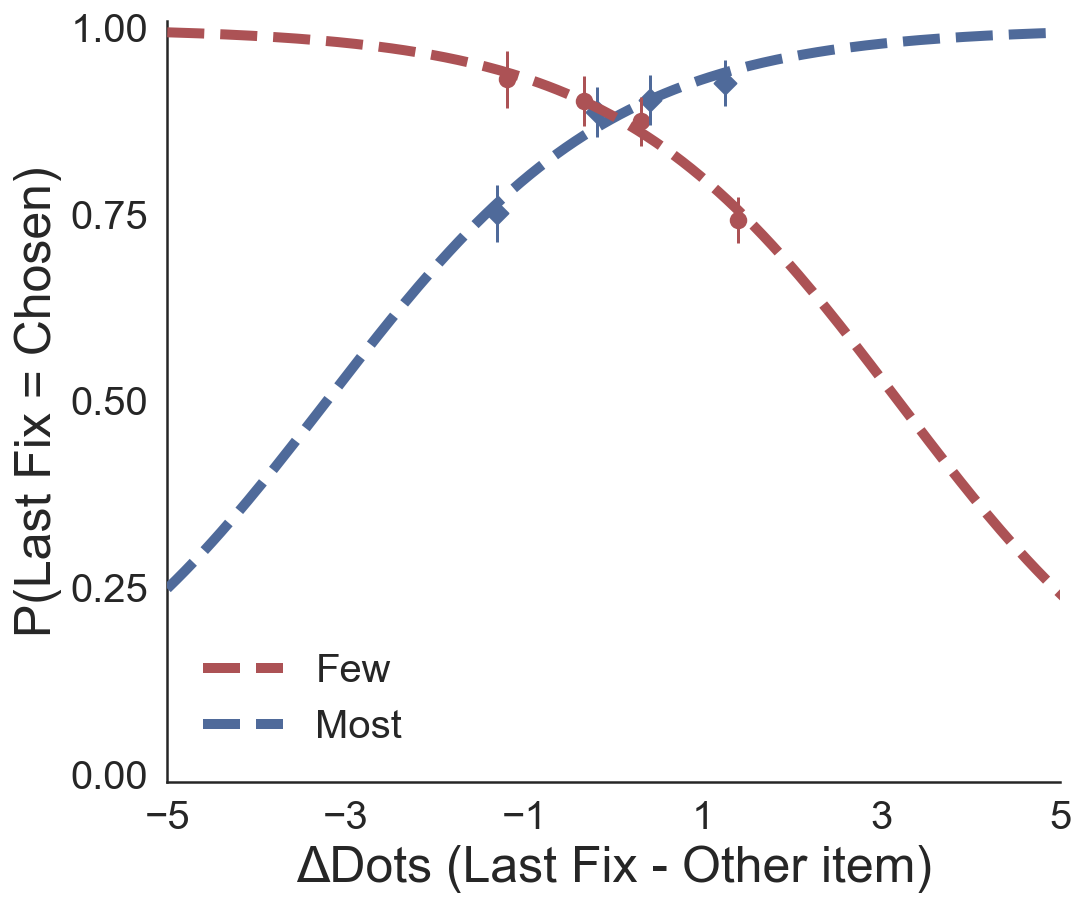

In [122]:
logisticplot_like_dislike (data_expL,data_expD,'Most','Few', xaxis='zDVal_LastFix', yaxis='LastFixChosen', ylab='P(Last Fix = Chosen)', xlab='ΔDots (Last Fix - Other item)', modlowcol='#4F6A9A',modhighcol='#AC5255', parvar='Part')

### is last fixation duration modulated by number of dots?

∆ = 9.932437988281208; t =0.6035762560984861; p = 0.5505167556827671; compared fix:  lowBin - highBin
∆ = -4.150860002790068; t =-0.5052419294541097; p = 0.6169623440354679; compared fix:  lowBin - highBin


([<matplotlib.axis.XTick at 0x7fe350cf0cf8>,
 <a list of 2 Text xticklabel objects>)

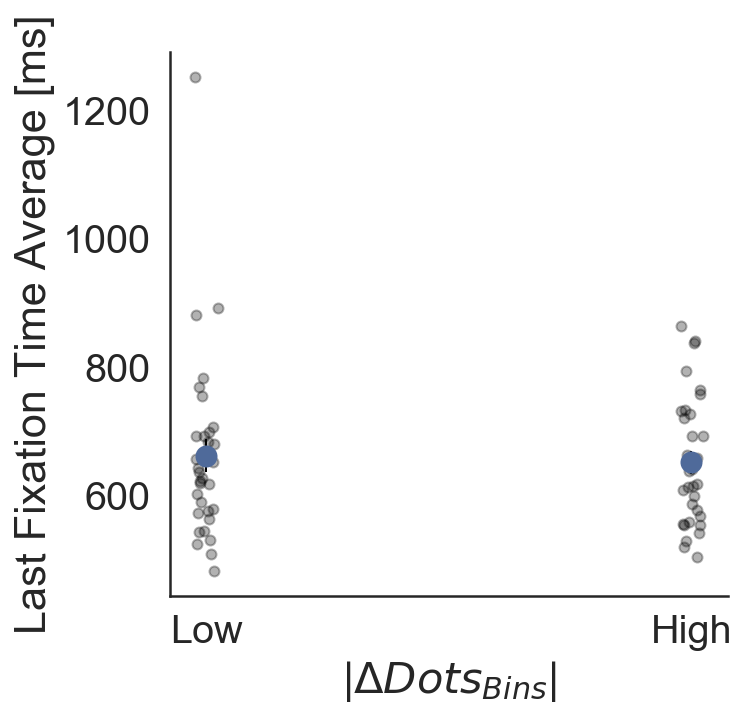

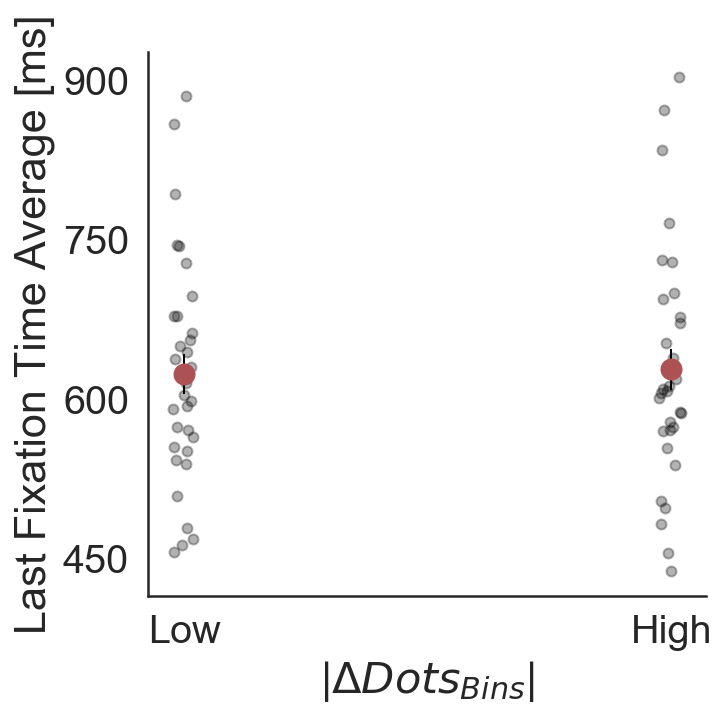

In [130]:
bin_param = 'zAbsDVal_bin2'
#bin_param ='zDVal_bin'

y_param = 'LastFixationTime'
y_param_label = 'Last Fixation Time Average [ms]'
x_param_label = '|$ΔDots_{Bins}$|'
plot_part_bin(data_expL,bin_param, y_param,y_param_label,x_param_label,addstar = 1,colsel ='#4F6A9A')
plt.xticks([0,1], ['Low','High'])
plot_part_bin(data_expD,bin_param, y_param,y_param_label,x_param_label,addstar = 1,colsel ='#AC5255')
plt.xticks([0,1], ['Low','High'])

#plot_part_bin2(data_expL,data_expD,bin_param, y_param,y_param_label,x_param_label,addstar = 1)


### is last fixation relative duration (within the trial) modulated by number of dots?

∆ = -1.5510130237844706; t =-3.9168435492460403; p = 0.0004600472111650529; compared fix:  lowBin - highBin
∆ = -1.5283898711427781; t =-3.7253616316375626; p = 0.0007787460179094305; compared fix:  lowBin - highBin


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x7fe32003fc50>,
 <a list of 2 Text xticklabel objects>)

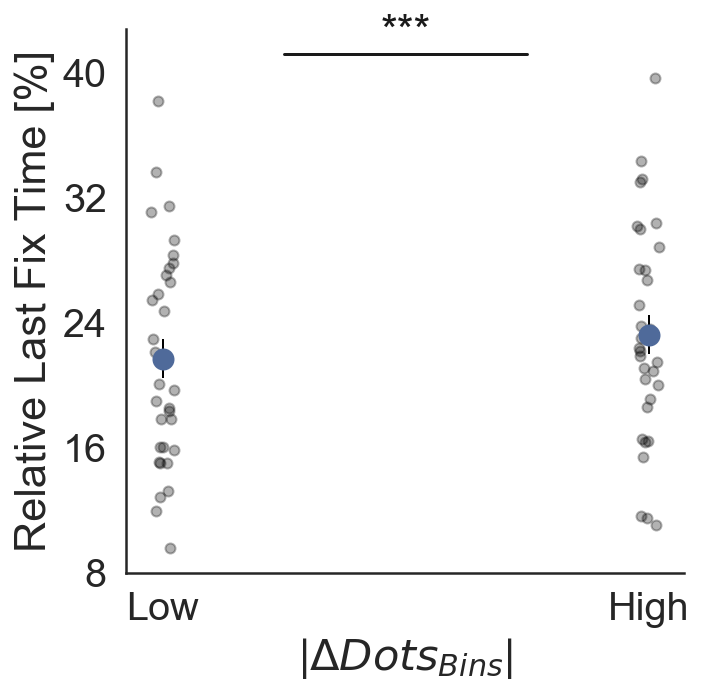

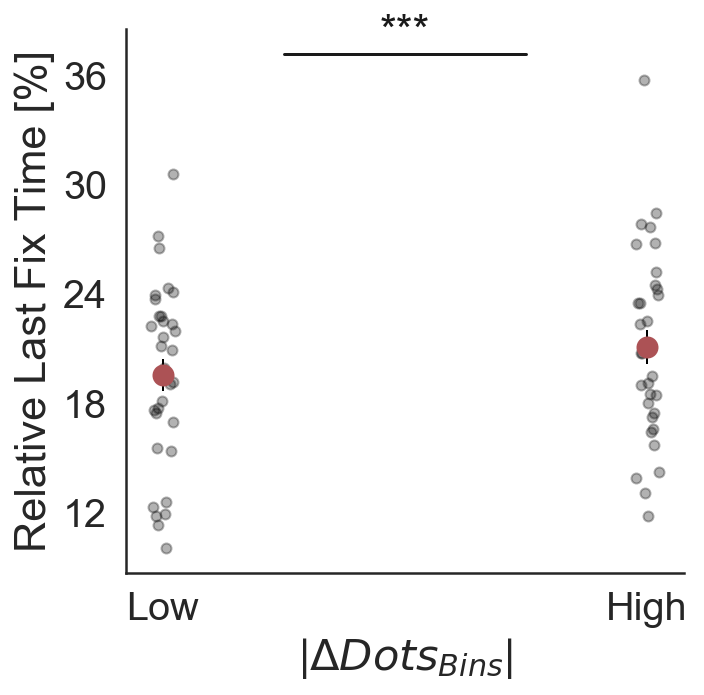

In [129]:
# estimate the relative duration of the last fixation in relation ot the total trial time
data_expL['relativeLastFixTime'] = data_expL['LastFixationTime']/data_expL['RT']*100
data_expD['relativeLastFixTime'] = data_expD['LastFixationTime']/data_expD['RT']*100
data_exp11['relativeLastFixTime'] = data_exp11['LastFixationTime']/data_exp11['RT']*100

bin_param = 'zAbsDVal_bin2'
y_param = 'relativeLastFixTime'
y_param_label = 'Relative Last Fix Time [%]'
x_param_label = '|$ΔDots_{Bins}$|'
plot_part_bin(data_expL,bin_param, y_param,y_param_label,x_param_label,addstar = 1,colsel ='#4F6A9A')
plt.xticks([0,1], ['Low','High'])
plot_part_bin(data_expD,bin_param, y_param,y_param_label,x_param_label,addstar = 1,colsel ='#AC5255')
plt.xticks([0,1], ['Low','High'])
#plot_part_bin2(data_expL,data_expD,bin_param, y_param,y_param_label,x_param_label,addstar = 1)


## Loading data in R

In [80]:
%R -i data_exp11 #-i fixation_timeline_R

In [82]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp11[ which(data_exp11$Block=='1'), ]
data_exp1_DisLike <- data_exp11[ which(data_exp11$Block=='2'), ]

#### Regressions per Condition (Like/Dislike)


[1] "Like BIC:"
[1] 56815.79


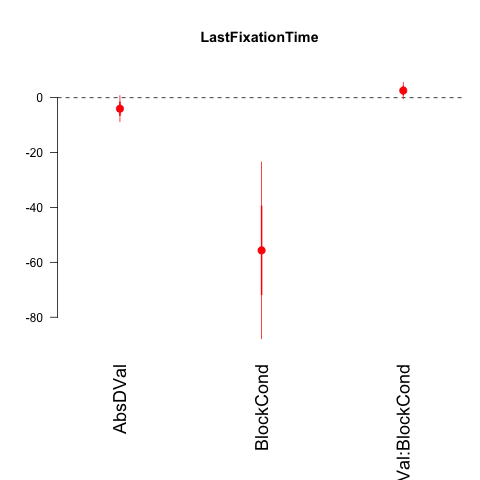

In [98]:
%%R

title_plot = "LastFixationTime "

ModelChoiceD_1 <- glm(LastFixationTime ~ AbsDVal +BlockCond+AbsDVal:BlockCond  , data=data_exp11 )
#ModelChoiceL_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zMidfix_ddt , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
#BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
#print("DisLike BIC:")
#print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,main=title_plot)
#coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
#legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

## Middle fixations analysis

### Eliminate trials with 1st fixation at 0 (Krajbich,2010)

In [148]:
print ('rate of eliminated trials due to 1st fixation at 0: ' + str(data_exp11.firstFix_0_flag.sum()/len(data_exp11)))
data_exp11 = data_exp11.loc[data_exp11["firstFix_0_flag"] == 0] # keep only the trials that start 1st fixation looking at the items

# Aditionally: Eliminate trials with null (or negative) middle fixations¶
print ('rate of eliminated trials due to null middle fix: ' + str(pd.isna(data_exp11.middleFixTimeAvg).sum()/len(data_exp11)))
data_exp11 = data_exp11.loc[(pd.notnull(data_exp11.middleFixTimeAvg)) | (data_exp11.middleFixTimeAvg < 0)]

rate of eliminated trials due to 1st fixation at 0: 0.004427083333333333
rate of eliminated trials due to null middle fix: 0.08017263928851687


### Add  % time looked at each item - for middle fixations

In [149]:
data_exp11['LGazePC'] = (data_exp11['midfix_Ltime']) / (data_exp11['midfix_Rtime'] + data_exp11['midfix_Ltime'])
data_exp11['RGazePC'] = (data_exp11['midfix_Rtime']) / (data_exp11['midfix_Rtime'] + data_exp11['midfix_Ltime'])

In [150]:
data_exp11['HValGazePC'] = ( data_exp11['LVal'] >= data_exp11['RVal'] ) * data_exp11['LGazePC'] + ( data_exp11['LVal'] <= data_exp11['RVal'] ) * data_exp11['RGazePC']
data_exp11['LValGazePC'] = ( data_exp11['LVal'] <= data_exp11['RVal'] ) * data_exp11['LGazePC'] + ( data_exp11['LVal'] >= data_exp11['RVal'] ) * data_exp11['RGazePC']

In [151]:
data_exp11['zLGazePC'] = z_score1(data_exp11,'Part','LGazePC')
data_exp11['zRGazePC'] = z_score1(data_exp11,'Part','RGazePC')

In [152]:
data_exp11['zHValGazePC'] = z_score1(data_exp11,'Part','HValGazePC')
data_exp11['zLValGazePC'] = z_score1(data_exp11,'Part','LValGazePC')  

### Add % time looked at chosen items

In [153]:
data_exp11['ChosenGazePC'] = ( data_exp11['Choice'] == 0) * data_exp11['LGazePC'] + ( data_exp11['Choice'] == 1) * data_exp11['LGazePC']
data_exp11['UnchosenGazePC'] = ( data_exp11['Choice'] == 1) * data_exp11['LGazePC'] + ( data_exp11['Choice'] == 0)  * data_exp11['RGazePC']

data_exp11['zChosenGazePC'] = z_score1(data_exp11,'Part','ChosenGazePC')
data_exp11['zUnchosenGazePC'] = z_score1(data_exp11,'Part','UnchosenGazePC')  

###  z-score middle fixations ddt

In [154]:
data_exp11["zMidfix_ddt"] = z_score1(data_exp11,'Part',"midfix_ddt")
data_exp11["zmiddleFixTimeAvg"] = z_score1(data_exp11,'Part',"middleFixTimeAvg")

### z-score middle fixation values in fixations_details_df

In [155]:
fixations_details_df["zValFix"] = z_score1(fixations_details_df,'Part',"ValFix")
fixations_details_df["zDValFix"] = z_score1(fixations_details_df,'Part',"DValFix")

### mean durations of middle fixations to High and Low Value Items

In [156]:
data_exp11['HValAvgGazePC'] = ( data_exp11['LVal'] > data_exp11['RVal'] ) * data_exp11['midfix_avgLtime'] + ( data_exp11['LVal'] <= data_exp11['RVal'] ) * data_exp11['midfix_avgRtime']
data_exp11['LValAvgGazePC'] = ( data_exp11['LVal'] < data_exp11['RVal'] ) * data_exp11['midfix_avgLtime'] + ( data_exp11['LVal'] >= data_exp11['RVal'] ) * data_exp11['midfix_avgRtime']

### probability first fixation to high value item


In [157]:
first_fix_2 = [] # create vector to indicate if the 2nd fixation is going to the high or low value


for i in range(len(data_exp11)):
    if data_exp11.iloc[i].LVal > data_exp11.iloc[i].RVal: # if left item is higher value
        if data_exp11.iloc[i]['1stFixation'] == 1 :# if fixation is to the highvalue
            first_fix_2.append(1)
        else:
            first_fix_2.append(0)
    elif data_exp11.iloc[i].LVal < data_exp11.iloc[i].RVal: # if right item is higher value
        if data_exp11.iloc[i]['1stFixation'] == 2 :# if fixation is to the highvalue
            first_fix_2.append(1)
        else:
            first_fix_2.append(0)
    else:
            first_fix_2.append(0.5)
    if i%500 == 0 :
        print('500 in')

data_exp11['FirstFix2High'] =  first_fix_2

500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in


### generate bin variable according to AbsDVal (difficulty)

In [158]:
# to do a binning per participant
#Dval_bin = []
#for i in range(len(par_list)):
#    data_exp11_part = data_exp11.loc[ data_exp11["Part"] == par_list[i]] 
#    bin_num = 3
#    Dval_bin_part = pd.to_numeric(pd.qcut(data_exp11_part["AbsDVal"].values, bin_num , labels=range(bin_num),duplicates='drop'))
#    Dval_bin.extend(Dval_bin_part.tolist())
#data_exp11['AbsDVal_bin'] =  Dval_bin

bin_num = 5
Dval_bin = pd.to_numeric(pd.qcut(data_exp11["zAbsDVal"].values, bin_num , labels=range(bin_num)))

data_exp11['zAbsDVal_bin'] =  Dval_bin

bin_num = 2
Dval_bin = pd.to_numeric(pd.qcut(data_exp11["zAbsDVal"].values, bin_num , labels=range(bin_num)))

data_exp11['zAbsDVal_bin2'] =  Dval_bin


### generate bin variable according to DVal (difficulty with sign)

In [159]:
# to do a binning per participant
#Dval_bin = []
#for i in range(len(par_list)):
#    data_exp11_part = data_exp11.loc[ data_exp11["Part"] == par_list[i]] 
#    bin_num = 3
#    Dval_bin_part = pd.to_numeric(pd.qcut(data_exp11_part["AbsDVal"].values, bin_num , labels=range(bin_num),duplicates='drop'))
#    Dval_bin.extend(Dval_bin_part.tolist())
#data_exp11['AbsDVal_bin'] =  Dval_bin

bin_num = 5
Dval_bin = pd.to_numeric(pd.qcut(data_exp11["zDVal"].values, bin_num , labels=range(bin_num)))

data_exp11['zDVal_bin'] =  Dval_bin

bin_num = 2
Dval_bin = pd.to_numeric(pd.qcut(data_exp11["zDVal"].values, bin_num , labels=range(bin_num)))

data_exp11['zDVal_bin2'] =  Dval_bin


### generate bin variable for fixations_details_df

In [160]:

# drop NaNs from the dataframe
fixations_details_df = fixations_details_df.dropna()
bin_num = 11
valFix_bin_part = pd.to_numeric(pd.qcut(fixations_details_df["zValFix"].values, bin_num , labels=range(bin_num)))
#valFix_bin.extend(valFix_bin_part.tolist())
DvalFix_bin_part = pd.to_numeric(pd.qcut(fixations_details_df["zDValFix"].values, bin_num , labels=range(bin_num)))
#DValFix_bin.extend(DvalFix_bin_part.tolist())

fixations_details_df['zValFix_bin'] =  valFix_bin_part
fixations_details_df['zDValFix_bin'] =  DvalFix_bin_part


### generate bin according to the value of the right left alternatives

In [161]:
bin_num = 5
# generate bins for right alternative
RVal_bin = pd.to_numeric(pd.qcut(data_exp11["zRVal"].values, bin_num , labels=range(bin_num)))
data_exp11['zRVal_bin'] =  RVal_bin

# generate bins for left alternative
LVal_bin = pd.to_numeric(pd.qcut(data_exp11["zLVal"].values, bin_num , labels=range(bin_num)))
data_exp11['zLVal_bin'] =  LVal_bin


In [162]:
bin_num = 2
# generate bins for right alternative
RVal_bin = pd.to_numeric(pd.qcut(data_exp11["zRVal"].values, bin_num , labels=range(bin_num)))
data_exp11['zRVal_bin2'] =  RVal_bin

# generate bins for left alternative
LVal_bin = pd.to_numeric(pd.qcut(data_exp11["zLVal"].values, bin_num , labels=range(bin_num)))
data_exp11['zLVal_bin2'] =  LVal_bin


In [163]:
# non-final fixation gaze per cent
data_exp11['NFF_LGazePC'] = (data_exp11['nff_ltime']) / (data_exp11['nff_rtime'] + data_exp11['nff_ltime'])
data_exp11['NFF_RGazePC'] = (data_exp11['nff_rtime']) / (data_exp11['nff_rtime'] + data_exp11['nff_ltime'])

### separate dataframes per condition (1: most; 2: fewest)

In [164]:
data_expL = data_exp11.loc[data_exp11['BlockCond'] == 1] 
data_expD = data_exp11.loc[data_exp11['BlockCond'] == 2] 

# for fixations_details_df

fixations_details_df_L = fixations_details_df.loc[fixations_details_df.Block == 'MORE']
fixations_details_df_D = fixations_details_df.loc[fixations_details_df.Block == 'LESS']


# Allocation of middle fixations - percent time observing items

In [165]:
LikeHighValGaze  =  []
LikeLowValGaze  =  []
DislikeHighValGaze  =  []
DislikeLowValGaze  =  []

LikeChoGaze  =  []
LikeUnchoGaze  =  []
DislikeChoGaze  =  []
DislikeUnchoGaze  =  []

for i in data_expL.Part.unique():
    
    Lik_MeanHValGazePC = data_expL.loc[(data_expL['Part'] == i)].HValGazePC.mean()
    Dlik_MeanHValGazePC = data_expD.loc[(data_expD['Part'] == i)].HValGazePC.mean()
    
    Lik_MeanLValGazePC = data_expL.loc[(data_expL['Part'] == i)].LValGazePC.mean()
    Dlik_MeanLValGazePC = data_expD.loc[(data_expD['Part'] == i)].LValGazePC.mean()
    
    LikeHighValGaze.append(Lik_MeanHValGazePC)
    LikeLowValGaze.append(Lik_MeanLValGazePC)
    DislikeHighValGaze.append(Dlik_MeanHValGazePC)
    DislikeLowValGaze.append(Dlik_MeanLValGazePC)
    
    
    Lik_MeanChoGazePC = data_expL.loc[(data_expL['Part'] == i)].ChosenGazePC.mean()
    Dlik_MeanChoGazePC = data_expD.loc[(data_expD['Part'] == i)].ChosenGazePC.mean()
    
    Lik_MeanUnchoGazePC = data_expL.loc[(data_expL['Part'] == i)].UnchosenGazePC.mean()
    Dlik_MeanUnchoGazePC = data_expD.loc[(data_expD['Part'] == i)].UnchosenGazePC.mean()
    
    LikeChoGaze.append(Lik_MeanChoGazePC)
    LikeUnchoGaze.append(Lik_MeanUnchoGazePC)
    DislikeChoGaze.append(Dlik_MeanChoGazePC)
    DislikeUnchoGaze.append(Dlik_MeanUnchoGazePC)
    
    
error_LikeHighValGaze  = SE_calc(LikeHighValGaze)
error_LikeLowValGaze  =  SE_calc(LikeLowValGaze)
error_DislikeHighValGaze  = SE_calc(DislikeHighValGaze)
error_DislikeLowValGaze  =  SE_calc(DislikeLowValGaze)

avg_LikeHighValGaze  = np.mean(LikeHighValGaze)
avg_LikeLowValGaze  =   np.mean(LikeLowValGaze)
avg_DislikeHighValGaze  =  np.mean(DislikeHighValGaze)
avg_DislikeLowValGaze  =   np.mean(DislikeLowValGaze)

error_LikeChoGaze  = SE_calc(LikeChoGaze)
error_LikeUnchoGaze  =  SE_calc(LikeUnchoGaze)
error_DislikeChoGaze  = SE_calc(DislikeChoGaze)
error_DislikeUnchoGaze  =  SE_calc(DislikeUnchoGaze)

avg_LikeChoGaze  = np.mean(LikeChoGaze)
avg_LikeUnchoGaze  =   np.mean(LikeUnchoGaze)
avg_DislikeChoGaze  =  np.mean(DislikeChoGaze)
avg_DislikeUnchoGaze =   np.mean(DislikeUnchoGaze)



In [166]:
# t-test
diff = avg_LikeHighValGaze - avg_DislikeHighValGaze
[s1, p1] = stats.ttest_rel(LikeHighValGaze,DislikeHighValGaze)
print (" Like High Val Gaze =  "+ str(round(mean(avg_LikeHighValGaze),2))+ " ; Mean Dislike High Val Gaze =  "+ str(round(mean(avg_DislikeHighValGaze),2))+"; [Like - Dislike] =  " + str(round(diff,2)) +"; t =  " + str(round(s1,2)) + " ; p-value =" + str(round(p1,2) ))

diff = avg_LikeLowValGaze - avg_DislikeLowValGaze
[s2, p2] = stats.ttest_rel(LikeLowValGaze,DislikeLowValGaze)
print (" Like High Val Gaze =  "+ str(round(mean(avg_LikeLowValGaze),2))+ " ; Mean Dislike High Val Gaze =  "+ str(round(mean(avg_DislikeLowValGaze),2))+"; [Like - Dislike] =  " + str(round(diff,2)) +"; t =  " + str(round(s2,2)) + " ; p-value =" + str(round(p2,2) ))


diff = avg_LikeHighValGaze - avg_LikeLowValGaze
[s3, p3] = stats.ttest_rel(LikeHighValGaze,LikeLowValGaze)
print (" Like High=  "+ str(round(mean(avg_LikeHighValGaze),2))+ " ;   Low  =  "+ str(round(mean(avg_LikeLowValGaze),2))+"; [High - low] =  " + str(round(diff,2)) +"; t =  " + str(round(s3,2)) + " ; p-value =" + str(round(p3,2) ))

diff = avg_DislikeHighValGaze - avg_DislikeLowValGaze
[s4, p4] = stats.ttest_rel(DislikeHighValGaze,DislikeLowValGaze)
print (" DisLike High=  "+ str(round(mean(avg_DislikeHighValGaze),2))+ " ;   Low  =  "+ str(round(mean(avg_DislikeLowValGaze),2))+"; [high - low] =  " + str(round(diff,2)) +"; t =  " + str(round(s4,2)) + " ; p-value =" + str(round(p4,2) ))



 Like High Val Gaze =  0.44 ; Mean Dislike High Val Gaze =  0.56; [Like - Dislike] =  -0.13; t =  -10.51 ; p-value =0.0
 Like High Val Gaze =  0.56 ; Mean Dislike High Val Gaze =  0.44; [Like - Dislike] =  0.13; t =  10.51 ; p-value =0.0
 Like High=  0.44 ;   Low  =  0.56; [High - low] =  -0.13; t =  -7.88 ; p-value =0.0
 DisLike High=  0.56 ;   Low  =  0.44; [high - low] =  0.13; t =  10.43 ; p-value =0.0


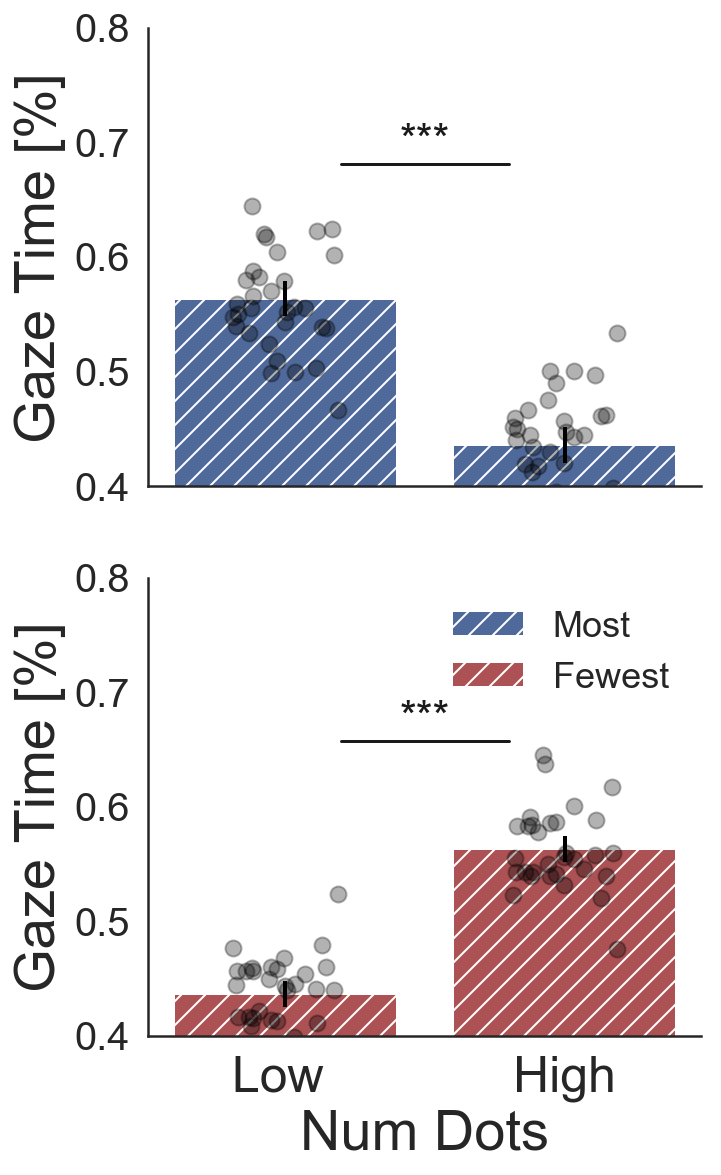

In [167]:
fig = plt.figure(figsize=[6,10])
gs = GridSpec(2,1,bottom=0.18,left=0.18,right=0.82)

ax1 = fig.add_subplot(gs[0,0])

add_star2(LikeLowValGaze,LikeHighValGaze, p3,1,2)
plt.yticks(fontsize=20)


ax2 = fig.add_subplot(gs[1,0])

# bars
ax1.bar(2, np.mean(LikeHighValGaze), width=0.8,color= '#4F6A9A',hatch=r'//')
ax1.bar(1, np.mean(LikeLowValGaze), width=0.8,color= '#4F6A9A',hatch=r'//')

ax2.bar(2, np.mean(DislikeHighValGaze), width=0.8,color='#AC5255',hatch=r'//')
ax2.bar(1, np.mean(DislikeLowValGaze), width=0.8,color='#AC5255',hatch=r'//')


# error
ax1.errorbar(2, np.mean(LikeHighValGaze), yerr=error_LikeHighValGaze*1.96, lw=2, color='#000000')
ax1.errorbar(1, np.mean(LikeLowValGaze), yerr=error_LikeLowValGaze*1.96, lw=2, color='#000000')

ax2.errorbar(2, np.mean(DislikeHighValGaze), yerr=error_DislikeHighValGaze*1.96, lw=2, color='#000000')
ax2.errorbar(1, np.mean(DislikeLowValGaze), yerr=error_DislikeLowValGaze*1.96, lw=2, color='#000000')
     
    
for i in range(1,len(LikeHighValGaze)):
        jittr = np.random.uniform(low=-0.2,high=0.2)
        ax1.plot(2+jittr, LikeHighValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax1.plot(1+jittr, LikeLowValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax2.plot(2+jittr, DislikeHighValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax2.plot(1+jittr, DislikeLowValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
ax1.set_xticks([1,2])
ax1.set_xticklabels([], rotation=0, fontsize=25)
ax1.set_ylabel('Gaze Time [%]', fontsize=28)
#ax1.set_xticklabels([], rotation=0, fontsize=25)

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'//', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'//', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)
        
ax2.set_xticks([1,2])
ax2.set_xticklabels(["Low ","High"], rotation=0, fontsize=25)
ax2.set_ylabel('Gaze Time [%]', fontsize=28)
ax2.set_xlabel('Num Dots', fontsize=28)

ax1.set_ylim([0.4,0.80])
ax2.set_ylim([0.4,0.80])

plt.yticks(fontsize=20)


sns.despine()




add_star2(DislikeLowValGaze,DislikeHighValGaze, p4,1,2)


#fig.savefig(str('SavedFigures/BehavGazeMoreLess_31.png'), dpi = 200 )

# Average fixation time for middle fixations

Most
∆ = -43.097675478876226; t =-4.162199340052153; p = 3.2570745839552684e-05; compared fix:  
Fewest
∆ = 50.56743279556008; t =5.055326757647766; p = 4.605368327239493e-07; compared fix:  


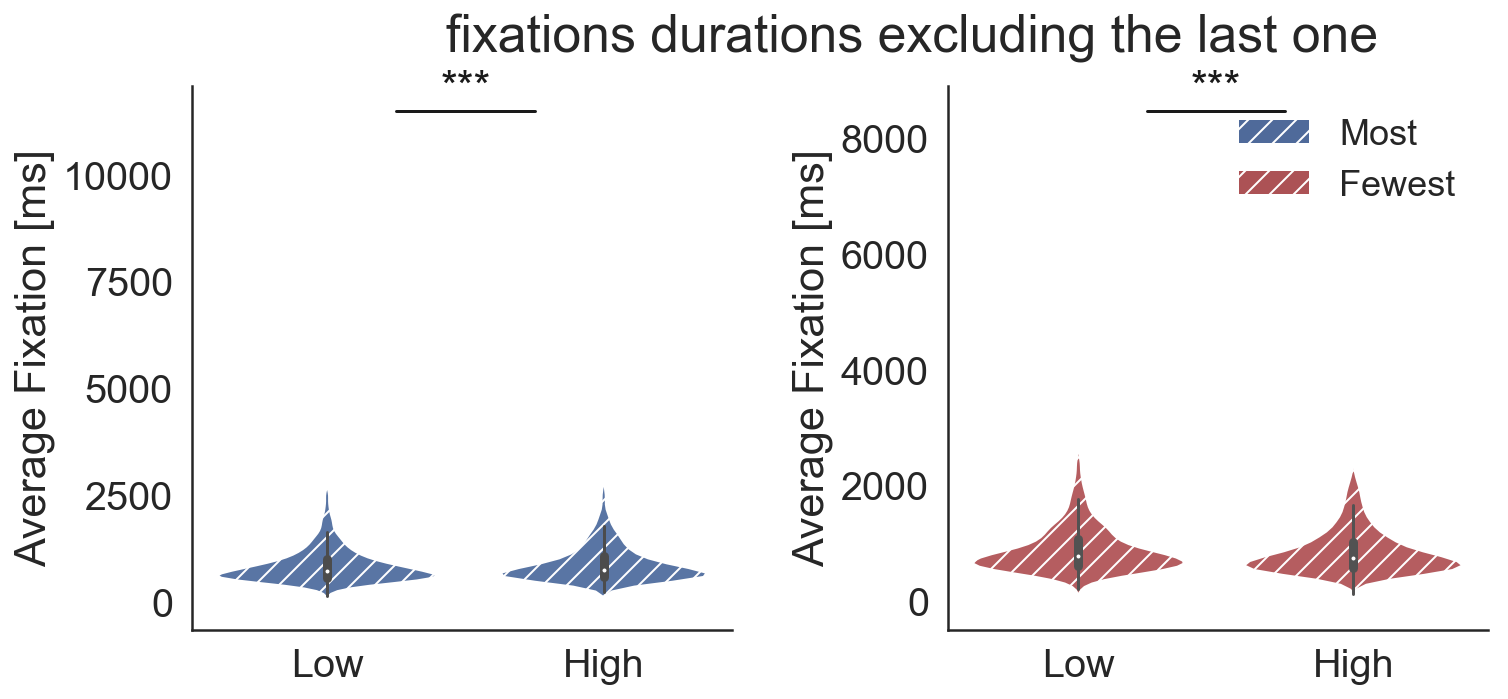

In [168]:
f = plt.figure(figsize=(10,5))
sns.set(style='white', font_scale=1.8)
plt.suptitle('fixations durations excluding the last one')
my_pal = {0 :"b", 1 : "b"}

wspace1 = 0.4
left1 = 0.3 

plt.subplot(121)
print('Most')
all_arr = [data_expL.LValAvgGazePC.values,
          data_expL.HValAvgGazePC.values]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='Average Fixation [ms]')   

plt.xticks([0, 1,], ['Low', 'High'])
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
add_star(data_expL.LValAvgGazePC.values.tolist(), data_expL.HValAvgGazePC.values.tolist(),0,1,'')
#plt.ylim(0, 5)

plt.subplots_adjust(left=0, wspace=wspace1)

plt.subplot(122)

my_pal = {0 :"r", 1 : "r"}

print('Fewest')
all_arr = [data_expD.LValAvgGazePC.values,
          data_expD.HValAvgGazePC.values]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='Average Fixation [ms]')   

plt.xticks([0, 1,], ['Low', 'High'])
#plt.tick_params( axis='y', which='both',bottom=False,top=False,labelbottom=False) 

add_star(data_expD.LValAvgGazePC.values.tolist(), data_expD.HValAvgGazePC.values.tolist(),0,1,'')

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'//', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'//', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)

sns.despine()


## Plot average duration of middle fixation vs last fixations

Most
∆ = 227.3879149403365; t =27.117151510073974; p = 1.6852196877199585e-146; compared fix:  
Fewest
∆ = 199.2964615133384; t =26.98860063703963; p = 1.3545844324435176e-146; compared fix:  


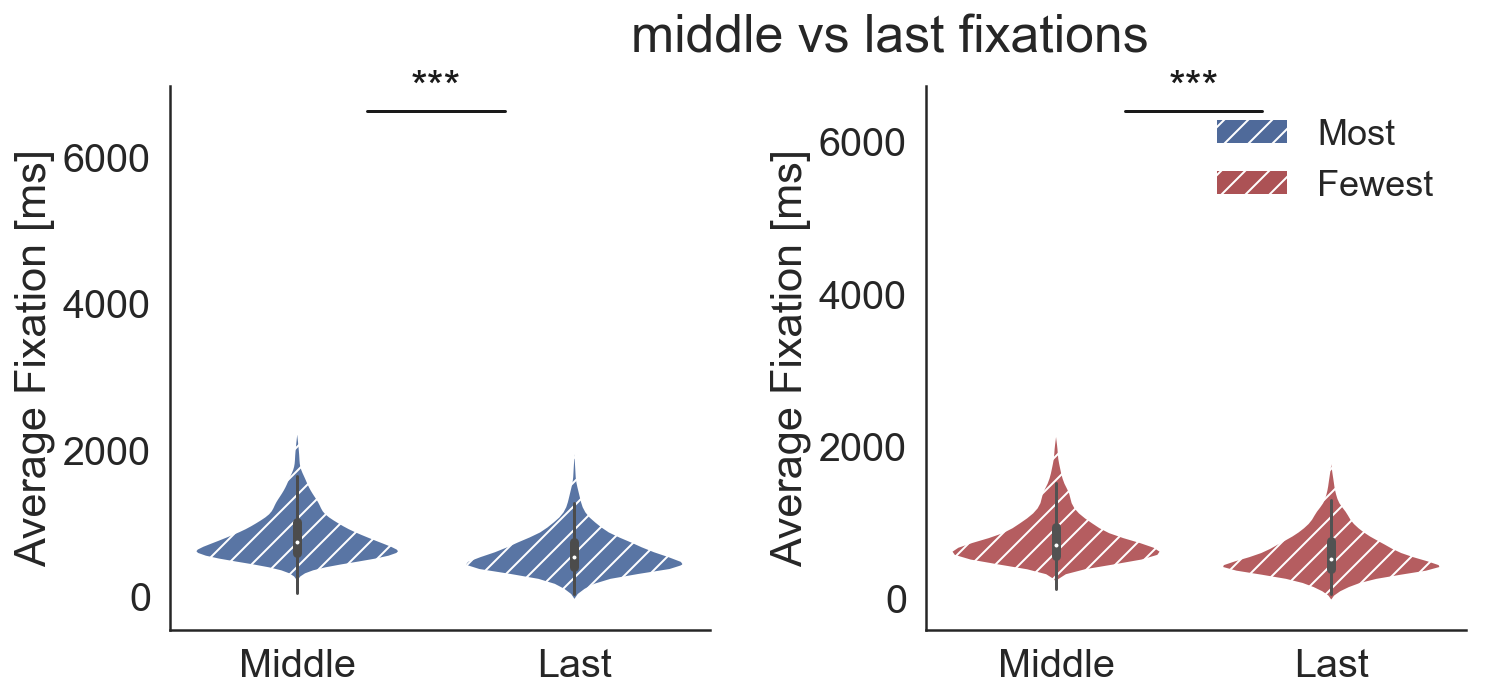

In [169]:
f = plt.figure(figsize=(10,5))
sns.set(style='white', font_scale=1.8)
plt.suptitle('middle vs last fixations')
my_pal = {0 :"b", 1 : "b"}

wspace1 = 0.4
left1 = 0.3 

plt.subplot(121)
print('Most')
all_arr = [data_expL.middleFixTimeAvg.values,
          data_expL.LastFixationTime.values]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='Average Fixation [ms]')   

plt.xticks([0, 1,], ['Middle', 'Last'])
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
add_star(data_expL.middleFixTimeAvg.values.tolist(), data_expL.LastFixationTime.values.tolist(),0,1,'')
#plt.ylim(0, 5)

plt.subplots_adjust(left=0, wspace=wspace1)

plt.subplot(122)

my_pal = {0 :"r", 1 : "r"}

print('Fewest')
all_arr = [data_expD.middleFixTimeAvg.values,
          data_expD.LastFixationTime.values]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='Average Fixation [ms]')   

plt.xticks([0, 1,], ['Middle', 'Last'])
#plt.tick_params( axis='y', which='both',bottom=False,top=False,labelbottom=False) 

add_star(data_expD.middleFixTimeAvg.values.tolist(), data_expD.LastFixationTime.values.tolist(),0,1,'')

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'//', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'//', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)

sns.despine()


Most
∆ = 225.22624357673988; t =6.161176709629527; p = 7.763286564505275e-07; compared fix:  mid - last
∆ = 167.28757256951747; t =2.475967835916915; p = 0.018953533793912538; compared fix:  first - last
∆ = -57.93867100722241; t =-1.1236594067283292; p = 0.2697841224717681; compared fix:  first - mid
Fewest
∆ = 198.64577808167394; t =5.709313836306769; p = 2.8121566368408002e-06; compared fix:  mid - last
∆ = 124.02466956045942; t =2.2603248340284563; p = 0.030970862777971987; compared fix:  first - last
∆ = -74.62110852121452; t =-1.9784893637226753; p = 0.056817994665696446; compared fix:  first - mid


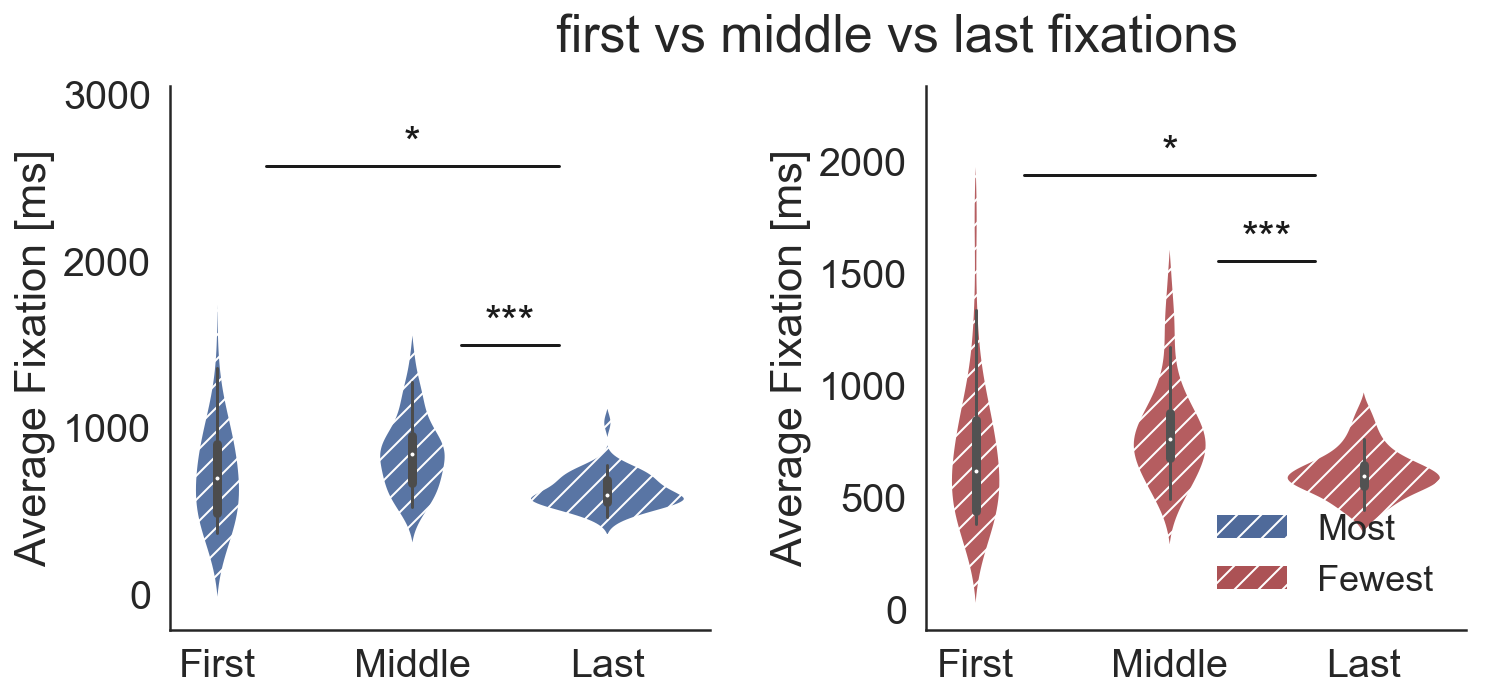

In [170]:
f = plt.figure(figsize=(10,5))
sns.set(style='white', font_scale=1.8)
plt.suptitle(' first vs middle vs last fixations')
my_pal = {0 :"b", 1 : "b",2 : "b"}

wspace1 = 0.4
left1 = 0.3 

plt.subplot(121)
print('Most')

FirstFixTime = data_expL.groupby('Part')['1stFixationTime'].mean()
MiddleFixTime = data_expL.groupby('Part')['middleFixTimeAvg'].mean()
LastFixTime = data_expL.groupby('Part')['LastFixationTime'].mean()

all_arr = [FirstFixTime,
           MiddleFixTime,
           LastFixTime]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='Average Fixation [ms]')   

plt.xticks([0,1,2], ['First','Middle', 'Last'])
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 

# add statistical analysis
add_star(MiddleFixTime, LastFixTime,1,2,'mid - last')
add_star(FirstFixTime, LastFixTime,0,2,'first - last')
add_star(FirstFixTime, MiddleFixTime,0,1,'first - mid')
#
#plt.ylim(0, 5)

plt.subplots_adjust(left=0, wspace=wspace1)

plt.subplot(122)

my_pal = {0 :"r", 1 : "r",2 : "r"}

print('Fewest')

FirstFixTime = data_expD.groupby('Part')['1stFixationTime'].mean()
MiddleFixTime = data_expD.groupby('Part')['middleFixTimeAvg'].mean()
LastFixTime = data_expD.groupby('Part')['LastFixationTime'].mean()

all_arr = [FirstFixTime,
           MiddleFixTime,
           LastFixTime]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='Average Fixation [ms]')   

plt.xticks([0,1,2], ['First','Middle', 'Last'])
#plt.tick_params( axis='y', which='both',bottom=False,top=False,labelbottom=False) 

# add statistical analysis
add_star(MiddleFixTime, LastFixTime,1,2,'mid - last')
add_star(FirstFixTime, LastFixTime,0,2,'first - last')
add_star(FirstFixTime, MiddleFixTime,0,1,'first - mid')
#
patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'//', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'//', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "lower right",frameon = False)

sns.despine()


Most
Fewest


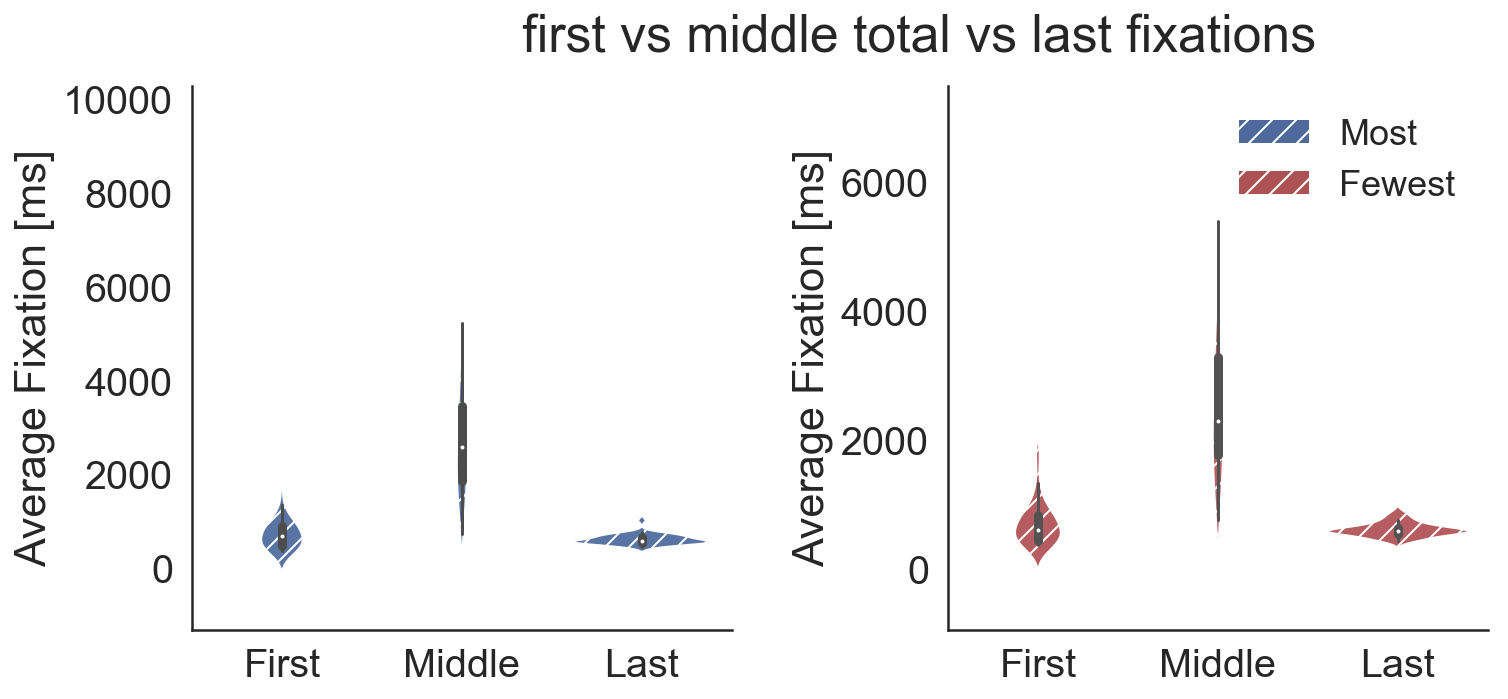

In [171]:
f = plt.figure(figsize=(10,5))
sns.set(style='white', font_scale=1.8)
plt.suptitle(' first vs middle total vs last fixations')
my_pal = {0 :"b", 1 : "b",2 : "b"}

wspace1 = 0.4
left1 = 0.3 

plt.subplot(121)
print('Most')

FirstFixTime = data_expL.groupby('Part')['1stFixationTime'].mean()
MiddleFixTime = data_expL.groupby('Part')['middleFixTime'].mean()
LastFixTime = data_expL.groupby('Part')['LastFixationTime'].mean()

all_arr = [FirstFixTime,
           MiddleFixTime,
           LastFixTime]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='Average Fixation [ms]')   

plt.xticks([0,1,2], ['First','Middle', 'Last'])

plt.subplots_adjust(left=0, wspace=wspace1)

plt.subplot(122)

my_pal = {0 :"r", 1 : "r",2 : "r"}

print('Fewest')

FirstFixTime = data_expD.groupby('Part')['1stFixationTime'].mean()
MiddleFixTime = data_expD.groupby('Part')['middleFixTime'].mean()
LastFixTime = data_expD.groupby('Part')['LastFixationTime'].mean()

all_arr = [FirstFixTime,
           MiddleFixTime,
           LastFixTime]
bplot = sns.violinplot(data=all_arr , palette=my_pal,)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='Average Fixation [ms]')   


#.set( ylabel='Average Fixation [ms]')
plt.xticks([0,1,2], ['First','Middle', 'Last'])
#plt.tick_params( axis='y', which='both',bottom=False,top=False,labelbottom=False) 

# add statistical analysis
#add_star(MiddleFixTime, LastFixTime,1,2,'mid - last')
#add_star(FirstFixTime, LastFixTime,0,2,'first - last')
#add_star(FirstFixTime, MiddleFixTime,0,1,'first - mid')
#
patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'//', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'//', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)

sns.despine()


## generate bin variable according to difficulty

In [172]:
#Dval_bin = []
#for i in range(len(par_list)):
#    data_exp11_part = data_exp11.loc[ data_exp11["Part"] == par_list[i]] 
#    bin_num = 3
#    Dval_bin_part = pd.to_numeric(pd.qcut(data_exp11_part["AbsDVal"].values, bin_num , labels=range(bin_num),duplicates='drop'))
#    Dval_bin.extend(Dval_bin_part.tolist())
#data_exp11['AbsDVal_bin'] =  Dval_bin

## First Fixations

In [173]:
mean_Lik_MeanHVal2Fix = []
mean_Dis_MeanHVal2Fix = []
for i in data_expL.Part.unique():
    
    Lik_MeanHVal2Fix = data_expL.loc[(data_expL['Part'] == i)]['FirstFix2High'].mean()
    Dis_MeanHVal2Fix = data_expD.loc[(data_expD['Part'] == i)]['FirstFix2High'].mean()
    
    mean_Lik_MeanHVal2Fix.append(Lik_MeanHVal2Fix)
    mean_Dis_MeanHVal2Fix.append(Dis_MeanHVal2Fix)
  

e_LikHVal2Fix  = SE_calc(mean_Lik_MeanHVal2Fix)
e_DisHVal2Fix  = SE_calc(mean_Dis_MeanHVal2Fix)

avg_LikHVal2Fix  = np.mean(mean_Lik_MeanHVal2Fix)
avg_DisHVal2Fix  = np.mean(mean_Dis_MeanHVal2Fix)

# extract times when 2nd fixation goes to high value or low value item
high_Lik_2fixTime = data_expL.loc[(data_expL['FirstFix2High'] == 1)]['1stFixationTime'].values
low_Lik_2fixTime = data_expL.loc[(data_expL['FirstFix2High'] == 0)]['1stFixationTime'].values

high_Dis_2fixTime = data_expD.loc[(data_expD['FirstFix2High'] == 1)]['1stFixationTime'].values
low_Dis_2fixTime = data_expD.loc[(data_expD['FirstFix2High'] == 0)]['1stFixationTime'].values

∆ = 0.0528470864334426; t =5.898400690819596; p = 1.6389107585097247e-06; compared fix:  like - dislike


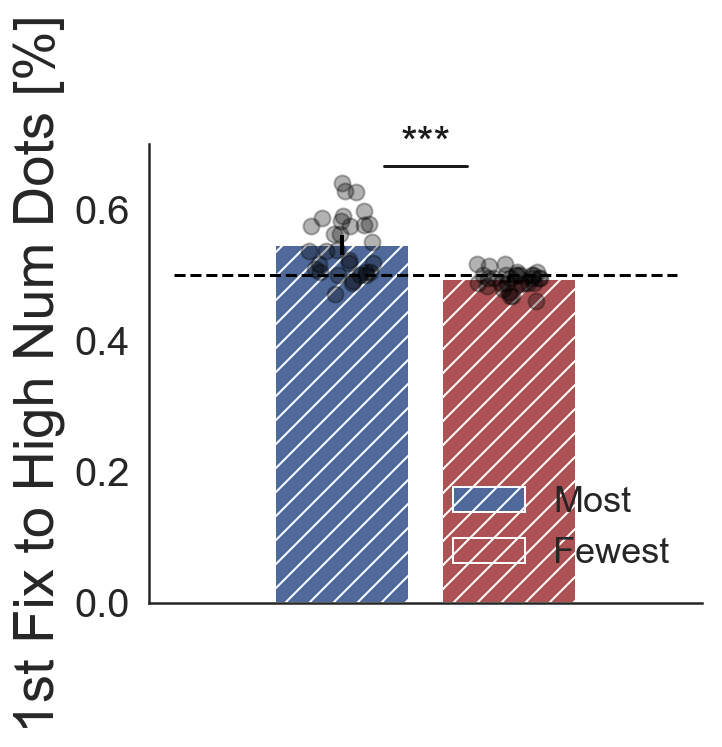

In [174]:
fig = plt.figure(figsize=[6,10])
gs = GridSpec(2,1,bottom=0.18,left=0.18,right=0.82)

ax1 = fig.add_subplot(gs[0,0])

add_star(mean_Lik_MeanHVal2Fix,mean_Dis_MeanHVal2Fix,1,2,'like - dislike')
plt.yticks(fontsize=20)


#ax2 = fig.add_subplot(gs[1,0])

# bars
ax1.bar(1, np.mean(mean_Lik_MeanHVal2Fix), width=0.8,color= '#4F6A9A',hatch=r'//')
ax1.bar(2, np.mean(mean_Dis_MeanHVal2Fix), width=0.8,color='#AC5255',hatch=r'//')

# error
ax1.errorbar(1, np.mean(mean_Lik_MeanHVal2Fix), yerr=e_LikHVal2Fix*1.96, lw=2, color='#000000')
ax1.errorbar(2, np.mean(mean_Dis_MeanHVal2Fix), yerr=e_DisHVal2Fix*1.96, lw=2, color='#000000')

for i in range(1,len(mean_Lik_MeanHVal2Fix)):
        jittr = np.random.uniform(low=-0.2,high=0.2)
        ax1.plot(1+jittr, mean_Lik_MeanHVal2Fix[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax1.plot(2+jittr, mean_Dis_MeanHVal2Fix[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
ax1.set_xticks([1,2])
ax1.set_xticklabels([], rotation=0, fontsize=25)
ax1.set_ylabel('1st Fix to High Num Dots [%]', fontsize=28)
#ax1.set_xticklabels([], rotation=0, fontsize=25)

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'//', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'//', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "lower right",frameon = False)
        

plt.yticks(fontsize=20)
plt.plot([0,3],[0.5,0.5],'--',color = 'black')


sns.despine()


#fig.savefig(str('SavedFigures/BehavGazeMoreLess_31.png'), dpi = 200 )

Most
∆ = -30.169260157284384; t =-1.2990053336873133; p = 0.19403200695553965; compared fix:  low-high
Fewest
∆ = 24.12194337899541; t =1.3884322647915148; p = 0.1650890825796149; compared fix:  low-high


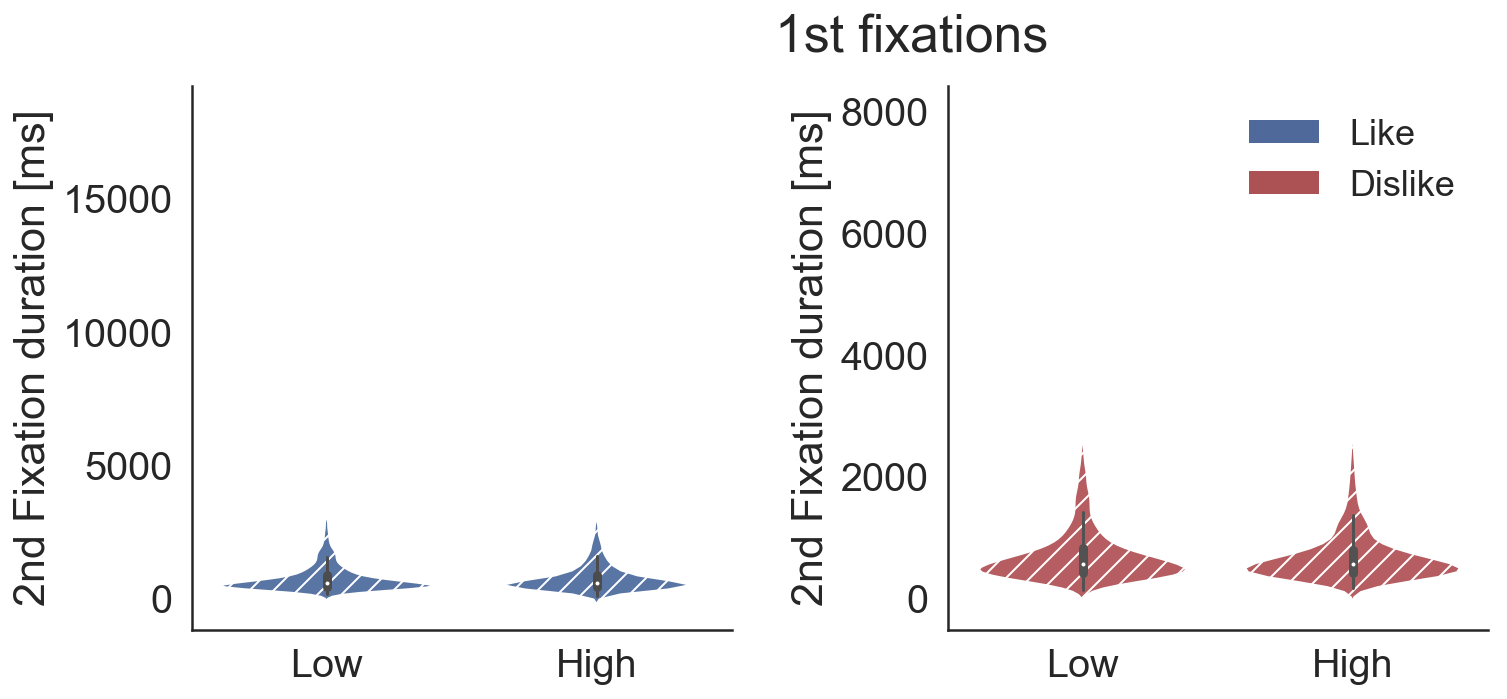

In [175]:
f = plt.figure(figsize=(10,5))
sns.set(style='white', font_scale=1.8)
plt.suptitle('1st fixations')
my_pal = {0 :"b", 1 : "b"}

wspace1 = 0.4
left1 = 0.3 

plt.subplot(121)
print('Most')
all_arr = [low_Lik_2fixTime,
          high_Lik_2fixTime]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='2nd Fixation duration [ms]') 

plt.xticks([0, 1,], ['Low', 'High'])
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
add_star_ind(low_Lik_2fixTime, high_Lik_2fixTime,0,1,'low-high')
#plt.ylim(0, 5)

plt.subplots_adjust(left=0, wspace=wspace1)

plt.subplot(122)

my_pal = {0 :"r", 1 : "r"}

print('Fewest')
all_arr = [low_Dis_2fixTime,
          high_Dis_2fixTime]
bplot = sns.violinplot(data=all_arr , palette=my_pal)
hatch = [r'//',r'//',r'//']
ihatch = iter(hatch)
_ = [i.set_hatch(next(ihatch)) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
_ = [i.set_edgecolor([1,1,1]) for i in bplot.get_children() if isinstance(i, mpl.collections.PolyCollection)]
bplot.set(ylabel='2nd Fixation duration [ms]')   

plt.xticks([0, 1,], ['Low', 'High'])
#plt.tick_params( axis='y', which='both',bottom=False,top=False,labelbottom=False) 

add_star_ind(low_Dis_2fixTime, high_Dis_2fixTime,0,1,'low-high')

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Like')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Dislike')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)

sns.despine()


### Define the first fixated item depending on the difference in ratings (Fig 3a, Krajbich,2010)

∆ = -0.041025638475087; t =-3.3808669915712692; p = 0.001968628931512965; compared fix:  lowBin - highBin
∆ = 0.025604052296322455; t =2.4658972848222955; p = 0.019402560165565304; compared fix:  lowBin - highBin


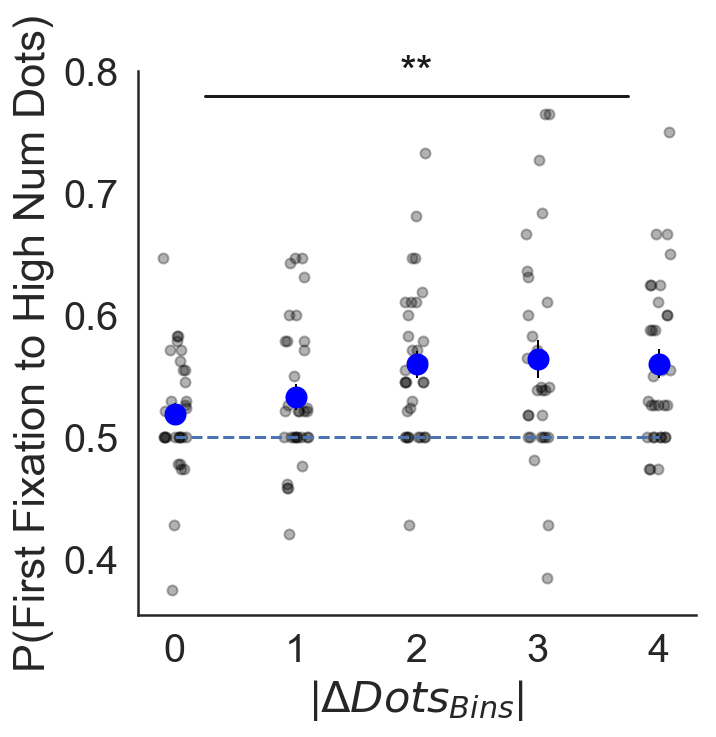

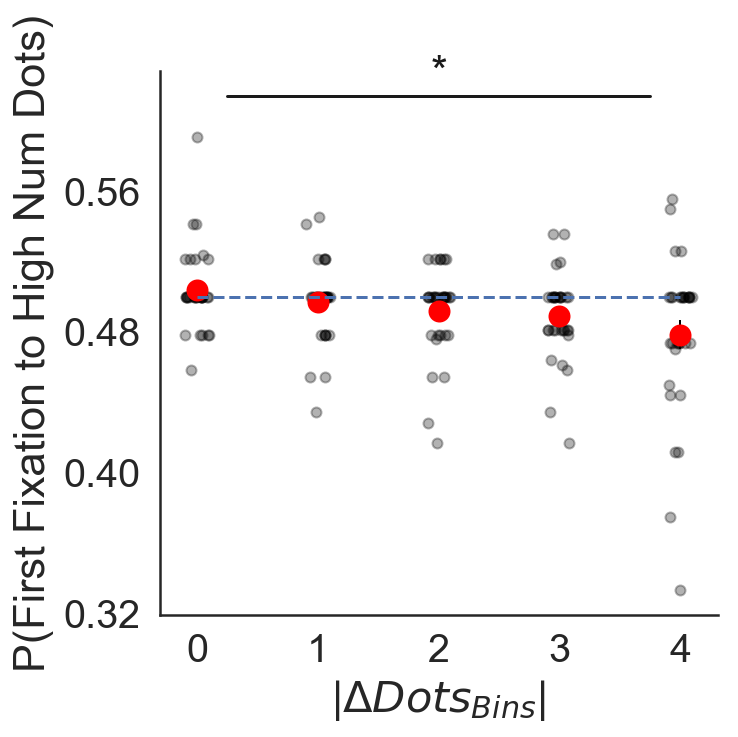

In [176]:
bin_param = 'zAbsDVal_bin'
y_param = 'FirstFix2High'
#y_param = '1stFixation'
y_param_label = 'P(First Fixation to High Num Dots)'
x_param_label = '|$ΔDots_{Bins}$|'
#like
plot_part_bin(data_expL,bin_param, y_param,y_param_label,x_param_label,plot_line=0.5, addstar = 1,colsel ='blue')
# dislike
plot_part_bin(data_expD,bin_param, y_param,y_param_label,x_param_label,plot_line=0.5, addstar = 1,colsel ='red')

∆ = 29.452443653473665; t =1.6253200806016346; p = 0.11421950981499983; compared fix:  lowBin - highBin
∆ = 3.2946119157674048; t =0.16344399772819984; p = 0.8712297749940432; compared fix:  lowBin - highBin


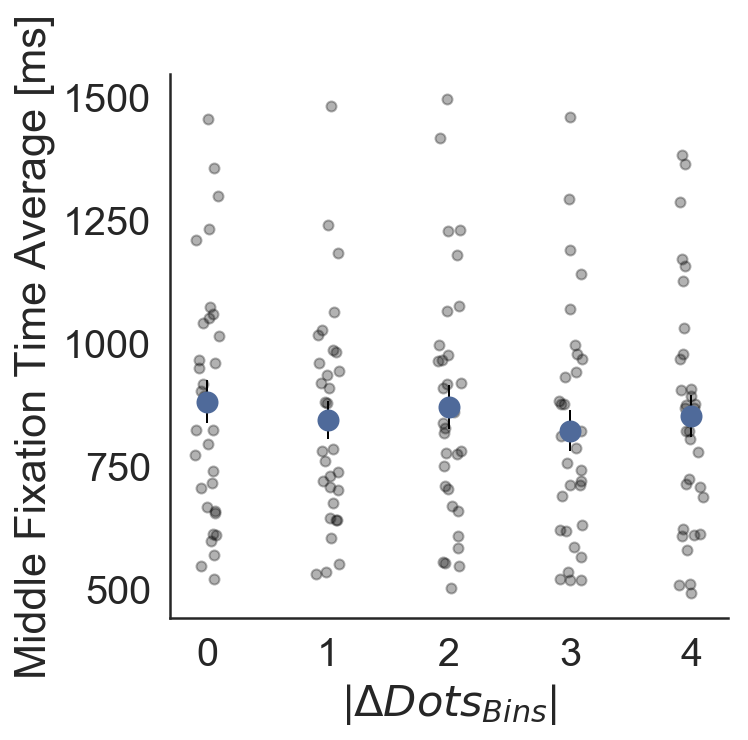

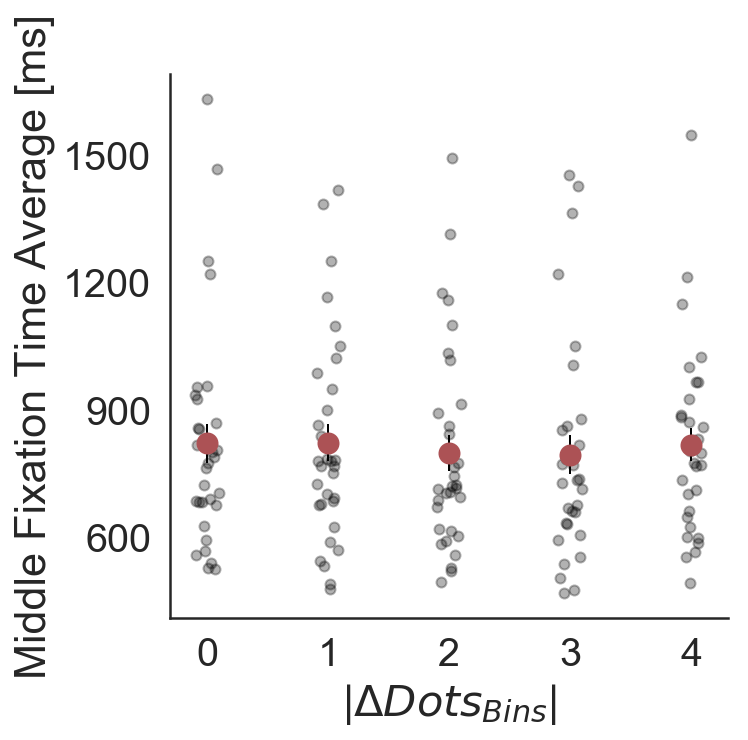

In [177]:
bin_param = 'zAbsDVal_bin'
y_param = 'middleFixTimeAvg'
y_param_label = 'Middle Fixation Time Average [ms]'
x_param_label = '|$ΔDots_{Bins}$|'
plot_part_bin(data_expL,bin_param, y_param,y_param_label,x_param_label,addstar = 1,colsel ='#4F6A9A')
plot_part_bin(data_expD,bin_param, y_param,y_param_label,x_param_label,addstar = 1,colsel ='#AC5255')



([<matplotlib.axis.XTick at 0x7fe37227c6a0>,
 <a list of 11 Text xticklabel objects>)

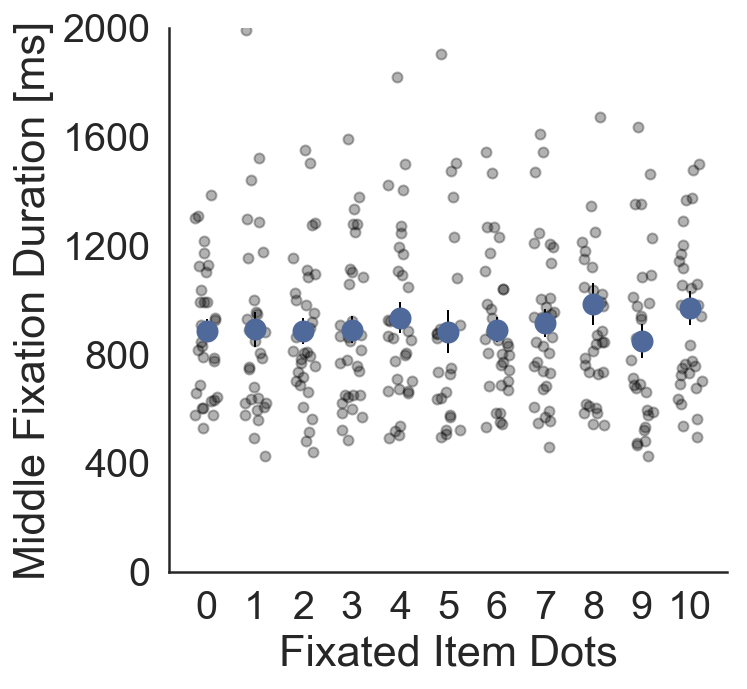

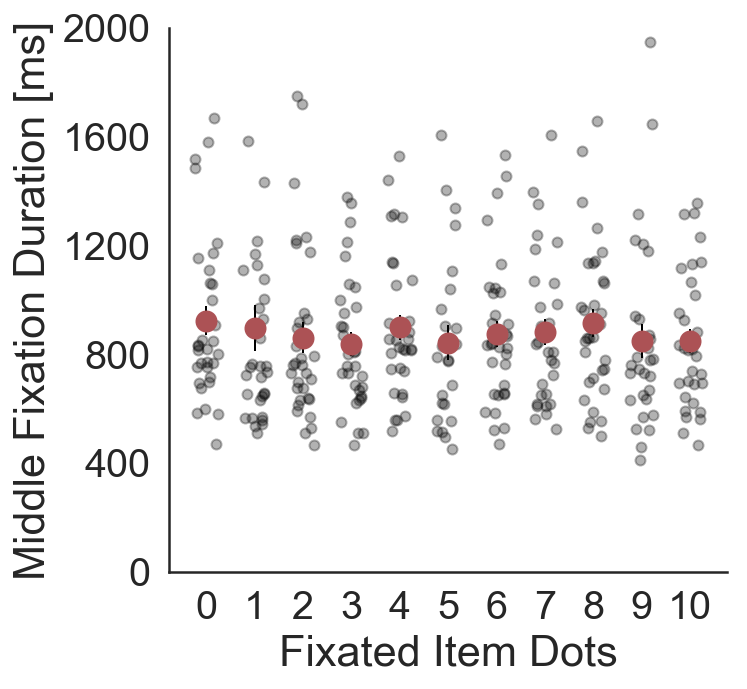

In [178]:
bin_param = 'zValFix_bin'
y_param = 'FixTime'
y_param_label = 'Middle Fixation Duration [ms]'
x_param_label = 'Fixated Item Dots'
# Like
plot_part_bin(fixations_details_df_L,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#4F6A9A')
plt.ylim([0, 2000])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [0,1,2,3,4,5,6,7,8,9,10])
# Dislike
plot_part_bin(fixations_details_df_D,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#AC5255')
plt.ylim([0, 2000])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [0,1,2,3,4,5,6,7,8,9,10])


([<matplotlib.axis.XTick at 0x7fe3810360f0>,
 <a list of 11 Text xticklabel objects>)

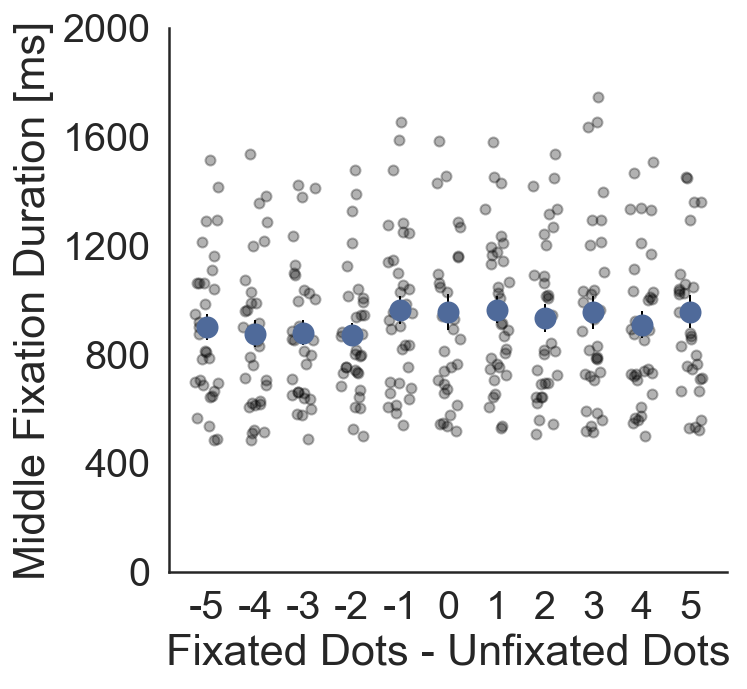

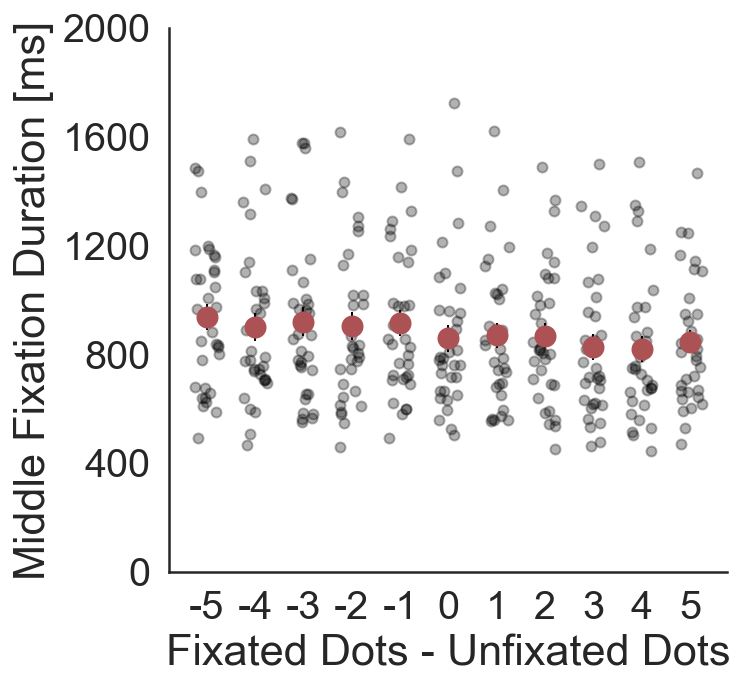

In [181]:
bin_param = 'zDValFix_bin'
y_param = 'FixTime'
y_param_label = 'Middle Fixation Duration [ms]'
x_param_label = 'Fixated Dots - Unfixated Dots'
# Like
plot_part_bin(fixations_details_df_L,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#4F6A9A')
plt.ylim([0, 2000])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [-5,-4,-3,-2,-1,0,1,2,3,4,5])

# Dislike
plot_part_bin(fixations_details_df_D,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#AC5255')
plt.ylim([0, 2000])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [-5,-4,-3,-2,-1,0,1,2,3,4,5])



<a id='reg'></a>
### Regression for mid fixations

In [229]:
fixations_details_df_L['AbsDValFix'] = np.abs(fixations_details_df_L['DValFix'])
fixations_details_df_D['AbsDValFix'] = np.abs(fixations_details_df_D['DValFix'])
fixations_details_df_L["zAbsDValFix"] = z_score1(fixations_details_df_L,'Part',"AbsDValFix")
fixations_details_df_D["zAbsDValFix"] = z_score1(fixations_details_df_D,'Part',"AbsDValFix")

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [230]:
fixations_details_df_L["zFixTime"] = z_score1(fixations_details_df_L,'Part',"FixTime")
fixations_details_df_D["zFixTime"] = z_score1(fixations_details_df_D,'Part',"FixTime")

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [231]:
print ('DValFix')
resultsL = pearsonr(fixations_details_df_L["FixTime"], fixations_details_df_L['zDValFix_bin'])
print ("Like / Pearson's r = {0}".format(np.round(resultsL[0], 4)), "p = ", np.round(resultsL[1], 4))

resultsD = pearsonr(fixations_details_df_D["FixTime"], fixations_details_df_D['zDValFix_bin'])
print ("Dislike / Pearson's r = {0}".format(np.round(resultsD[0], 4)), "p = ", np.round(resultsD[1], 4))

DValFix
Like / Pearson's r = 0.0408 p =  0.0001
Dislike / Pearson's r = -0.0585 p =  0.0


In [232]:
print ('ValFix')
resultsL = pearsonr(fixations_details_df_L["zFixTime"], fixations_details_df_L['zValFix_bin'])
print ("Like / Pearson's r = {0}".format(np.round(resultsL[0], 4)), "p = ", np.round(resultsL[1], 4))

resultsD = pearsonr(fixations_details_df_D["zFixTime"], fixations_details_df_D['zValFix_bin'])
print ("Dislike / Pearson's r = {0}".format(np.round(resultsD[0], 4)), "p = ", np.round(resultsD[1], 4))

ValFix
Like / Pearson's r = 0.0432 p =  0.0
Dislike / Pearson's r = -0.0011 p =  0.9071


In [235]:
%R -i fixations_details_df_L -i fixations_details_df_D #-i fixation_timeline_R

### Regressions for the ValFix_bin and DValFix_bin vs FixTime 

### Most

In [236]:
%%R

title_plot = "zFixTime "
F_hmodel =  lmer(zFixTime ~  zValFix_bin + zDValFix_bin + zAbsDValFix + (zValFix_bin + zDValFix_bin +zAbsDValFix | Part), data=fixations_details_df_L,
                    control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (F_hmodel)

#Extract parameters
fix_Choice_Dislike_hmodel <- fixef(F_hmodel)
fix_se_Choice_Dislike_hmodel <- sqrt(diag(vcov(F_hmodel)))
names_Choice_Dislike_hmodel <- names(F_hmodel)

# Extract mixed effect paramters
mix_Choice_Dislike_model <- coef(F_hmodel)

summary(F_hmodel)

lmer(formula = zFixTime ~ zValFix_bin + zDValFix_bin + zAbsDValFix + 
    (zValFix_bin + zDValFix_bin + zAbsDValFix | Part), data = fixations_details_df_L, 
    control = lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb")))
             coef.est coef.se
(Intercept)  -0.14     0.03  
zValFix_bin   0.02     0.01  
zDValFix_bin  0.01     0.00  
zAbsDValFix  -0.05     0.01  

Error terms:
 Groups   Name         Std.Dev. Corr              
 Part     (Intercept)  0.14                       
          zValFix_bin  0.02     -0.92             
          zDValFix_bin 0.01     -0.44  0.06       
          zAbsDValFix  0.05      0.17 -0.41  0.53 
 Residual              0.99                       
---
number of obs: 9573, groups: Part, 32
AIC = 27142.8, DIC = 27049
deviance = 27080.9 
Linear mixed model fit by REML ['lmerMod']
Formula: zFixTime ~ zValFix_bin + zDValFix_bin + zAbsDValFix + (zValFix_bin +  
    zDValFix_bin + zAbsDValFix | Part)
   Data: fixations_details_df_L
Contro

In [237]:
%%R
# Extract mixed effect paramters
mix_Confidence_Dislike_model <- coef(F_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(F_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(F_hmodel, fixef(F_hmodel))
coefs$df.KR <-(rep(df.KR, each=4))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

coefs

                Estimate  Std..Error   t.value    df.KR       semax
(Intercept)  -0.13734012 0.033899109 -4.051437 29.56025 -0.10344101
zValFix_bin   0.01804428 0.005884746  3.066279 29.56025  0.02392902
zDValFix_bin  0.01013048 0.003960096  2.558140 29.56025  0.01409058
zAbsDValFix  -0.05057010 0.014991575 -3.373235 29.56025 -0.03557852
                    semin         p.KR          p.z
(Intercept)  -0.171239228 0.0003384585 5.090395e-05
zValFix_bin   0.012159530 0.0046014743 2.167407e-03
zDValFix_bin  0.006170383 0.0158985762 1.052338e-02
zAbsDValFix  -0.065561673 0.0020893594 7.429065e-04


### Fewest

In [238]:
%%R

title_plot = "zFixTime "
F_hmodel =  lmer(zFixTime ~  zValFix_bin + zDValFix_bin + zAbsDValFix + (zValFix_bin + zDValFix_bin +zAbsDValFix | Part), data=fixations_details_df_D,
                    control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (F_hmodel)

#Extract parameters
fix_Choice_Dislike_hmodel <- fixef(F_hmodel)
fix_se_Choice_Dislike_hmodel <- sqrt(diag(vcov(F_hmodel)))
names_Choice_Dislike_hmodel <- names(F_hmodel)

# Extract mixed effect paramters
mix_Choice_Dislike_model <- coef(F_hmodel)

summary(F_hmodel)

lmer(formula = zFixTime ~ zValFix_bin + zDValFix_bin + zAbsDValFix + 
    (zValFix_bin + zDValFix_bin + zAbsDValFix | Part), data = fixations_details_df_D, 
    control = lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb")))
             coef.est coef.se
(Intercept)   0.11     0.03  
zValFix_bin   0.01     0.00  
zDValFix_bin -0.03     0.00  
zAbsDValFix  -0.01     0.02  

Error terms:
 Groups   Name         Std.Dev. Corr              
 Part     (Intercept)  0.12                       
          zValFix_bin  0.01     -1.00             
          zDValFix_bin 0.01     -1.00  1.00       
          zAbsDValFix  0.06      0.23 -0.23 -0.29 
 Residual              0.99                       
---
number of obs: 10323, groups: Part, 32
AIC = 29271.9, DIC = 29177.1
deviance = 29209.5 
Linear mixed model fit by REML ['lmerMod']
Formula: zFixTime ~ zValFix_bin + zDValFix_bin + zAbsDValFix + (zValFix_bin +  
    zDValFix_bin + zAbsDValFix | Part)
   Data: fixations_details_df_D
Con

In [239]:
%%R
# Extract mixed effect paramters
mix_Confidence_Dislike_model <- coef(F_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(F_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(F_hmodel, fixef(F_hmodel))
coefs$df.KR <-(rep(df.KR, each=4))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

coefs

                 Estimate  Std..Error    t.value    df.KR       semax
(Intercept)   0.109927298 0.032754976  3.3560488 29.36478  0.14268227
zValFix_bin   0.006431790 0.003986884  1.6132372 29.36478  0.01041867
zDValFix_bin -0.027164665 0.004068404 -6.6769833 29.36478 -0.02309626
zAbsDValFix  -0.005812035 0.016156761 -0.3597278 29.36478  0.01034473
                    semin         p.KR          p.z
(Intercept)   0.077172322 2.197298e-03 7.906462e-04
zValFix_bin   0.002444906 1.173898e-01 1.066930e-01
zDValFix_bin -0.031233069 2.379536e-07 2.439116e-11
zAbsDValFix  -0.021968797 7.216250e-01 7.190507e-01


## Non-Final fixations (excluding the last one)
### Compare time fixations depending on coherent value

In [85]:
#Bin Value
# 5 bins
bin_valL = np.concatenate((data_expL.zLVal_bin.values,data_expL.zRVal_bin.values),axis = 0).tolist()
bin_valD = np.concatenate((data_expD.zLVal_bin.values,data_expD.zRVal_bin.values),axis = 0).tolist()
# 2 bins
bin_val2L = np.concatenate((data_expL.zLVal_bin2.values,data_expL.zRVal_bin2.values),axis = 0).tolist()
bin_val2D = np.concatenate((data_expD.zLVal_bin2.values,data_expD.zRVal_bin2.values),axis = 0).tolist()

## Avg time non-last fixation
#Like
nff_avgTimeL = np.concatenate((data_expL.nff_avgltime.values,data_expL.nff_avgrtime.values),axis = 0).tolist()
#Dislike
nff_avgTimeD = np.concatenate((data_expD.nff_avgltime.values,data_expD.nff_avgrtime.values),axis = 0).tolist()

## Avg time non-last fixation
#Like
nff_TotTimeL = np.concatenate((data_expL.nff_ltime.values,data_expL.nff_rtime.values),axis = 0).tolist()
#Dislike
nff_TotTimeD = np.concatenate((data_expD.nff_ltime.values,data_expD.nff_rtime.values),axis = 0).tolist()

## Avg time non-last fixation
#Like
nff_GazePCL = np.concatenate((data_expL.NFF_LGazePC.values,data_expL.NFF_RGazePC.values),axis = 0).tolist()
#Dislike
nff_GazePCD = np.concatenate((data_expD.NFF_LGazePC.values,data_expD.NFF_RGazePC.values),axis = 0).tolist()

# particpants
part_idsL = np.concatenate((data_expL.Part.values,data_expL.Part.values),axis = 0).tolist()
part_idsD = np.concatenate((data_expD.Part.values,data_expD.Part.values),axis = 0).tolist()

# generate dataframe
nnfVal_dfL = pd.DataFrame({'Part':part_idsL,'ValBin':bin_valL,'NFF_AvgTime':nff_avgTimeL,'NFF_TotTime':nff_TotTimeL,'NFF_GazePC':nff_GazePCL})
nnfVal_dfD = pd.DataFrame({'Part':part_idsD,'ValBin':bin_valD,'NFF_AvgTime':nff_avgTimeD,'NFF_TotTime':nff_TotTimeD,'NFF_GazePC':nff_GazePCD})

nnfVal_df2L = pd.DataFrame({'Part':part_idsL,'ValBin':bin_val2L,'NFF_AvgTime':nff_avgTimeL,'NFF_TotTime':nff_TotTimeL,'NFF_GazePC':nff_GazePCL})
nnfVal_df2D = pd.DataFrame({'Part':part_idsD,'ValBin':bin_val2D,'NFF_AvgTime':nff_avgTimeD,'NFF_TotTime':nff_TotTimeD,'NFF_GazePC':nff_GazePCD})

### Average Fixation time

mean1:840.844785800899  ;  mean 2:810.637217102084
∆ = 30.207568698814953; t =0.4298927506453332; p = 0.6687641478120964; compared fix:  bin0
mean1:860.839276238588  ;  mean 2:809.2134451413456
∆ = 51.62583109724244; t =0.6608206248632669; p = 0.5111754107969395; compared fix:  bin1
mean1:865.9507045618429  ;  mean 2:811.3309691456753
∆ = 54.6197354161676; t =0.7644522228711048; p = 0.44749760403388417; compared fix:  bin2
mean1:884.9607128149552  ;  mean 2:833.2245433984541
∆ = 51.73616941650107; t =0.6755125154032499; p = 0.5018619898033814; compared fix:  bin3
mean1:914.6237255366938  ;  mean 2:809.3476634178891
∆ = 105.2760621188047; t =1.3529667876215878; p = 0.18097943997063418; compared fix:  bin4


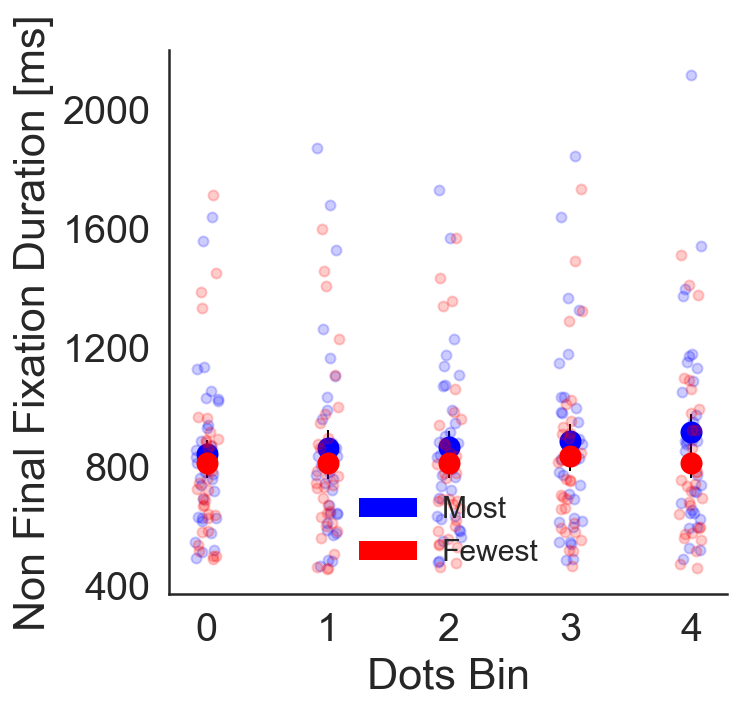

In [86]:
bin_param = 'ValBin'
y_param = 'NFF_AvgTime'
y_param_label = 'Non Final Fixation Duration [ms]'
x_param_label = 'Dots Bin'
plot_part_bin2(nnfVal_dfL,nnfVal_dfD,bin_param, y_param,y_param_label,x_param_label,addstar = 1)


mean1:854.1266196517412  ;  mean 2:810.7167393482559
∆ = 43.40988030348524; t =0.6051263824484264; p = 0.5473035986416934; compared fix:  bin0
mean1:889.4996344975586  ;  mean 2:826.7944111772881
∆ = 62.705223320270534; t =0.8275349837618646; p = 0.41110781905635896; compared fix:  bin1
∆ = -35.373014845817465; t =-0.4624076979980229; p = 0.6454077050306763; compared fix:  cross like
∆ = -16.07767182903217; t =-0.2265597652535308; p = 0.8215113914500906; compared fix:  cross dislike


([<matplotlib.axis.XTick at 0x7fe4f157be48>,
 <a list of 2 Text xticklabel objects>)

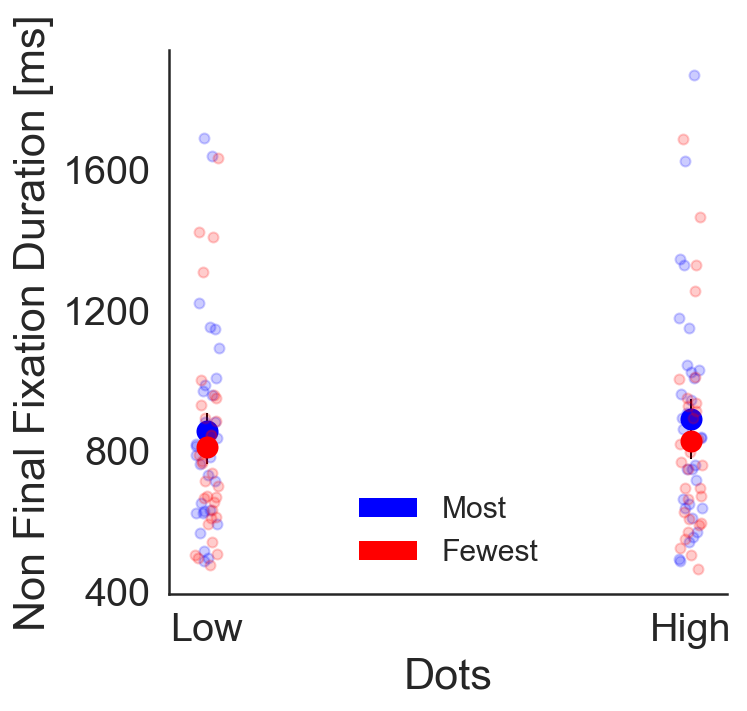

In [87]:
bin_param = 'ValBin'
y_param = 'NFF_AvgTime'
y_param_label = 'Non Final Fixation Duration [ms]'
x_param_label = 'Dots'
plot_part_bin2(nnfVal_df2L,nnfVal_df2D,bin_param, y_param,y_param_label,x_param_label,addstar = 1,crossstar  =1,crslow = 0.01)
plt.xticks([0,1], ['Low','High'])

### Total fixation time

mean1:1712.8433633836985  ;  mean 2:1501.6795371676753
∆ = 211.16382621602315; t =1.1463669965843628; p = 0.2560484682668695; compared fix:  bin0
mean1:1707.7107488423608  ;  mean 2:1591.3829115718338
∆ = 116.32783727052697; t =0.5200848245028761; p = 0.6048566134886422; compared fix:  bin1
mean1:1706.5670266277514  ;  mean 2:1645.4277318859577
∆ = 61.13929474179372; t =0.29586526500998434; p = 0.7683216773589786; compared fix:  bin2
mean1:1696.0345321061018  ;  mean 2:1625.8521971140372
∆ = 70.18233499206463; t =0.3410934176384835; p = 0.7341864946545755; compared fix:  bin3
mean1:1787.6596733101135  ;  mean 2:1700.4360922219767
∆ = 87.22358108813683; t =0.33203915263108513; p = 0.7409796122699474; compared fix:  bin4


(400, 2500)

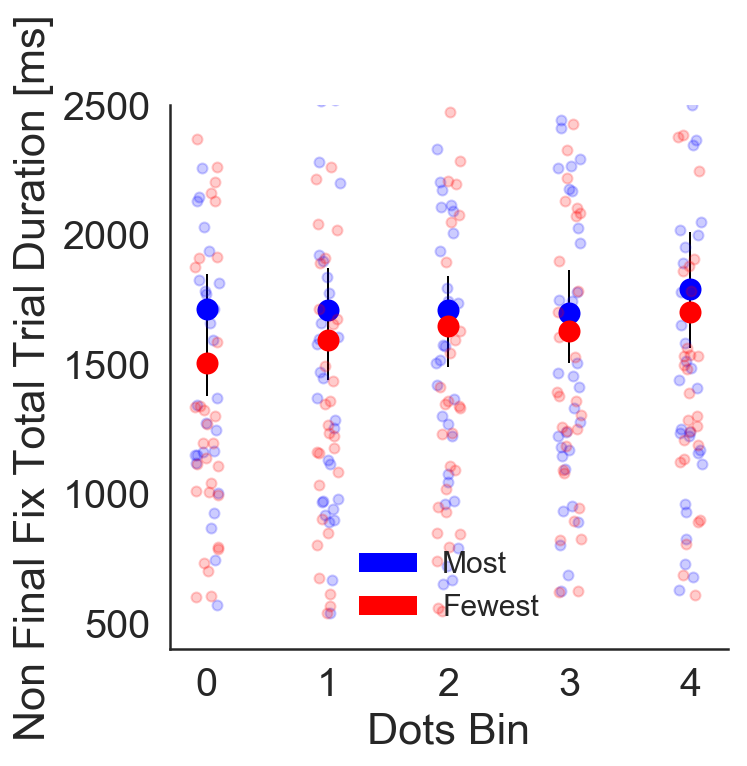

In [88]:
bin_param = 'ValBin'
y_param = 'NFF_TotTime'
y_param_label = 'Non Final Fix Total Trial Duration [ms]'
x_param_label = 'Dots Bin'
plot_part_bin2(nnfVal_dfL,nnfVal_dfD,bin_param, y_param,y_param_label,x_param_label,addstar = 1)
plt.ylim([400, 2500])


mean1:1709.1669380837538  ;  mean 2:1563.962128914074
∆ = 145.20480916967995; t =0.738166766371317; p = 0.46319810893189484; compared fix:  bin0
mean1:1714.5671789656003  ;  mean 2:1648.9775719049726
∆ = 65.58960706062771; t =0.30790094590875317; p = 0.7591897295374399; compared fix:  bin1
∆ = -5.400240881846457; t =-0.024639001878357963; p = 0.9804220411252711; compared fix:  cross like
∆ = -85.01544299089869; t =-0.44784900677933825; p = 0.6558231699563648; compared fix:  cross dislike


(400, 2500)

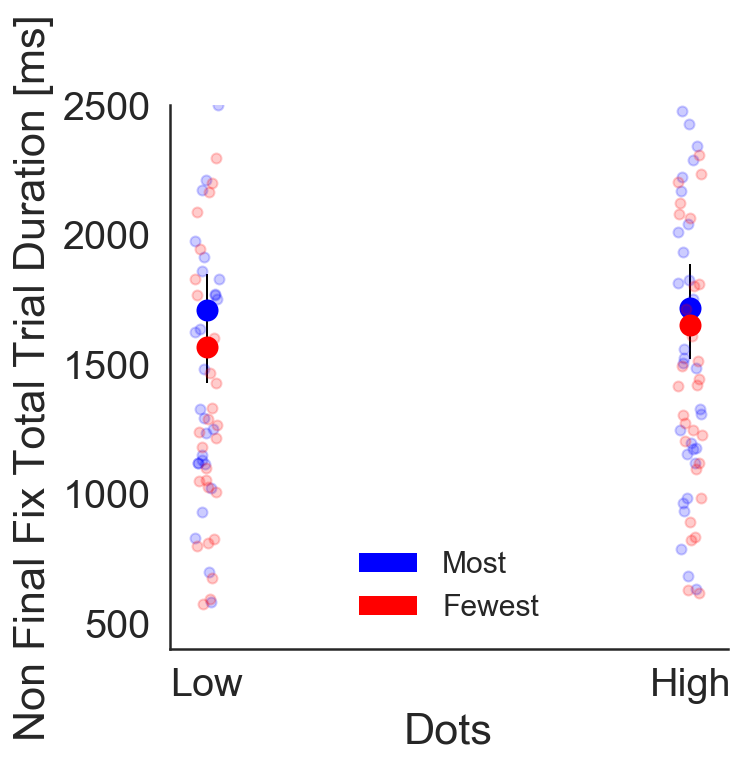

In [89]:
bin_param = 'ValBin'
y_param = 'NFF_TotTime'
y_param_label = 'Non Final Fix Total Trial Duration [ms]'
x_param_label = 'Dots'
plot_part_bin2(nnfVal_df2L,nnfVal_df2D,bin_param, y_param,y_param_label,x_param_label,addstar = 1,crossstar = 1,crslow = 0.01)
plt.xticks([0,1], ['Low','High'])
plt.ylim([400, 2500])


### gaze ratio

mean1:0.5050653955750246  ;  mean 2:0.4965861958784728
∆ = 0.008479199696551809; t =3.6561330556361304; p = 0.0005293867478773319; compared fix:  bin0
mean1:0.49984819797249047  ;  mean 2:0.49808137969234056
∆ = 0.0017668182801499066; t =0.34323769148950634; p = 0.7325808093537869; compared fix:  bin1
mean1:0.5049169135463143  ;  mean 2:0.49972884680715335
∆ = 0.005188066739160946; t =1.4739086164608601; p = 0.14556574147024082; compared fix:  bin2
mean1:0.5019810894035666  ;  mean 2:0.5003838423224487
∆ = 0.0015972470811178585; t =0.7973286412162743; p = 0.42830324162171696; compared fix:  bin3
mean1:0.468751727580092  ;  mean 2:0.5136198479647085
∆ = -0.04486812038461652; t =-6.1164304020141875; p = 7.06817941990294e-08; compared fix:  bin4


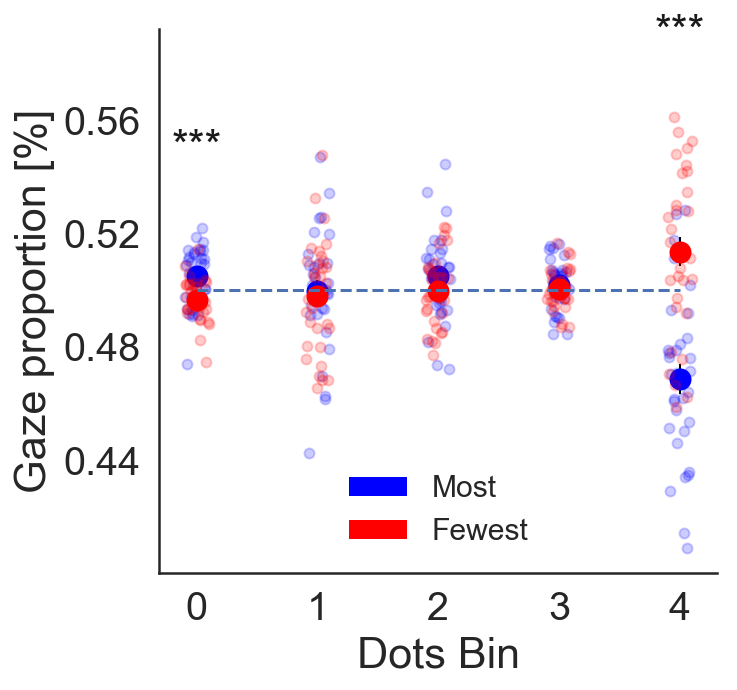

In [90]:
bin_param = 'ValBin'
y_param = 'NFF_GazePC'
y_param_label = 'Gaze proportion [%]'
x_param_label = 'Dots Bin'
plot_part_bin2(nnfVal_dfL,nnfVal_dfD,bin_param, y_param,y_param_label,x_param_label,addstar = 1,plot_line=.5)


mean1:0.5047857289125495  ;  mean 2:0.4972232481329994
∆ = 0.007562480779550074; t =8.354646972200989; p = 9.614724403377188e-12; compared fix:  bin0
mean1:0.49385323234733775  ;  mean 2:0.5039181576523363
∆ = -0.010064925304998529; t =-8.458150463191101; p = 6.367697911080493e-12; compared fix:  bin1
∆ = 0.010932496565211725; t =9.501107920111595; p = 1.0374958903033663e-13; compared fix:  cross like
∆ = -0.006694909519336878; t =-7.012888613448077; p = 2.0425435725581436e-09; compared fix:  cross dislike


([<matplotlib.axis.XTick at 0x7fe5115350b8>,
 <a list of 2 Text xticklabel objects>)

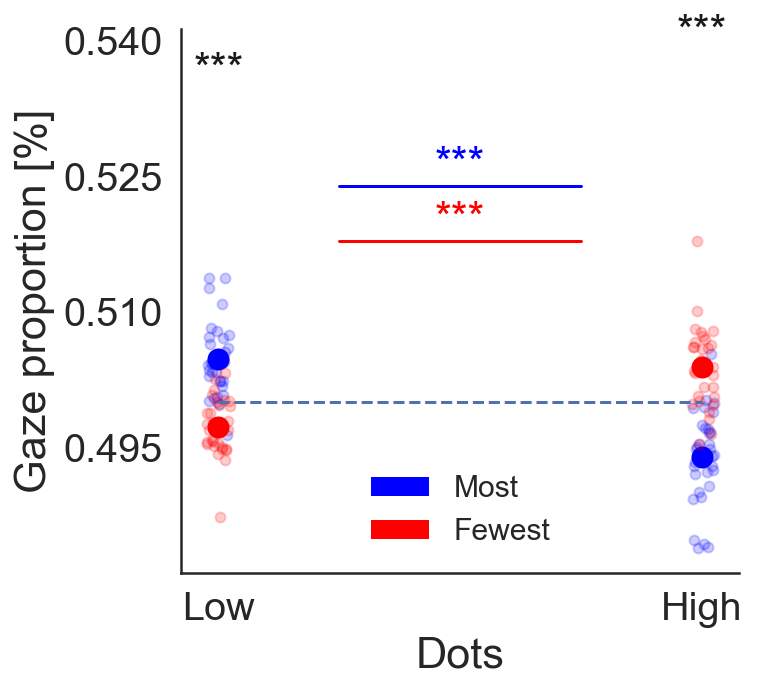

In [91]:
bin_param = 'ValBin'
y_param = 'NFF_GazePC'
y_param_label = 'Gaze proportion [%]'
x_param_label = 'Dots'
plot_part_bin2(nnfVal_df2L,nnfVal_df2D,bin_param, y_param,y_param_label,x_param_label,addstar = 1,plot_line=.5,crossstar = 1,crslow = 0.01)
plt.xticks([0,1], ['Low','High'])


<a id='reg'></a>
# Regression Analysis
-------------------------------------
 

## Loading data in R

In [72]:
data_exp11.columns

Index(['index', 'Unnamed: 0', 'Part', 'TrialN', 'PairID', 'LVal', 'RVal',
       'Choice', 'RT', 'Conf', 'ConfRT', 'BlockCond', 'DDT', 'LDwellTime',
       'RDwellTime', 'GSF', 'LastFixat', 'DVal', 'zDVal', 'AbsDVal',
       'zAbsDVal', 'zConf', 'zRT', 'TotVal', 'ChosenVal', 'UnchosenVal',
       'Correct', 'zTotVal', 'zChosenVal', 'zUnchosenVal', 'zGSF', 'zDDT',
       'zAbsDDT', 'zValR', 'zValL', 'ConfSplit', 'GSFSplit', 'DDTSplit',
       'BaseCode', 'High', 'Low', 'zRVal', 'zLVal', 'AbsDDT', 'zHighVal',
       'zLowVal', 'HighValPos', 'LowValPos', 'index', '1stFixation',
       '1stFixationTime', 'LastFixation', 'LastFixationTime', 'firstFixValue',
       'lastFixValue', 'fixatNum', 'middleFixNum', 'mostPopularFix',
       'numMostPopularFix', 'mostPopularFixMed', 'numMostPopularFixMed',
       'middleFixTime', 'middleFixTimeAvg', 'TotalTime', 'midfix_Ltime',
       'midfix_Rtime', 'midfix_ddt', 'midfix_avgLtime', 'midfix_avgRtime',
       'second_fix_time', 'second_fix_id', 'first

In [73]:
data_exp11.head()

,index,Unnamed: 0,Part,TrialN,PairID,LVal,RVal,Choice,RT,Conf,...,second_fix_id,firstFix_0_flag,nff_time,nff_ltime,nff_rtime,nff_avgltime,nff_avgrtime,FirstFix2High,zAbsDVal_bin,zAbsDVal_bin2
0,0,0,1,1,49,110,131,0,4261.735,74,...,2.0,0,909.0,2038.0,1598.0,1019.0,799.0,0,4,1
1,1,1,1,2,13,47,50,1,3559.258,54,...,2.0,0,712.0,1496.0,640.0,748.0,640.0,0,0,0
2,2,2,1,3,16,50,44,1,3754.464,64,...,2.0,0,726.0,1414.0,764.0,707.0,764.0,1,1,0
3,3,3,1,4,7,57,50,0,2431.751,84,...,2.0,0,934.0,1072.0,796.0,1072.0,796.0,1,2,0
4,4,4,1,5,18,42,50,0,2199.342,44,...,2.0,0,943.0,1232.0,654.0,1232.0,654.0,0,2,0


In [74]:
%R -i data_exp11 #-i fixation_timeline_R

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [75]:
%%R
library(lme4)
library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

In [76]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp11[ which(data_exp11$Block=='1'), ]
data_exp1_DisLike <- data_exp11[ which(data_exp11$Block=='2'), ]

<a id='regCond'></a>
# Regressions per Condition (Like/Dislike)


In [77]:
%%R

title_plot = "Choice "

ModelChoiceL_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zMidfix_ddt  , data=data_exp1_Like,  family=binomial(link="logit") )
ModelChoiceD_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zMidfix_ddt , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-2, 2) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)


Error in eval(predvars, data, env) : object 'zMidfix_ddt' not found


In [78]:
%%R

title_plot = "Mid Fixations "

ModelChoiceL_1 <- glm(zmiddleFixTimeAvg ~ zAbsDVal + zConf + zTotVal , data=data_exp1_Like )
ModelChoiceD_1 <- glm(zmiddleFixTimeAvg ~ zAbsDVal + zConf +  zTotVal , data=data_exp1_DisLike)

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-.5, .5) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)


Error in eval(predvars, data, env) : object 'zmiddleFixTimeAvg' not found


In [ ]:
%%R

title_plot = "Mid Fixations "

ModelChoiceL_1 <- glm(zmiddleFixTimeAvg ~ zAbsDVal + zConf + zTotVal , data=data_exp1_Like )
ModelChoiceD_1 <- glm(zmiddleFixTimeAvg ~ zAbsDVal + zConf +  zTotVal , data=data_exp1_DisLike)

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-.5, .5) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

## --[END]--

------------------------------------

<a id='ImpPkg'></a>
# 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [75]:
%%R
library(lme4)
library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [3]:
def participant_densities(data, var, xlim=(0,100), rug=True):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(15,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 3, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1

### Split variable into participantwise quantiles

In [4]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1),duplicates= 'drop')

    return qvalues

### Full simple logistic graph

In [5]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

### Full simple logistic graph (no bins)

In [6]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

### Regression Coefficients Plot

In [7]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [8]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [9]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [10]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [11]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [12]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [13]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(50,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['Part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4)       

    fig.text(0.5, 0.0, xlab, ha='center')
    fig.text(0.0, 0.5, ylab, va='center', rotation='vertical')
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [14]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [15]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    
    
    plt.show()


In [16]:
def ttestsPlot2(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",ylab = '',title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))

    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
        
    plt.scatter( [1] ,  [mean(data1)] , color = c1,s=140,edgecolors = 'black', )
    plt.scatter( [2] ,  [mean(data2)] , color = c2,s=140,edgecolors = 'black', )

    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(ylab, fontsize=25)
    plt.title(title, fontsize=25)
    
    sns.despine()

In [17]:
def ttestsBarPlot2(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",ylab = '',title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
    # Set seaborn style for the plot
    fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))
    
    plt.bar( [1] ,  [mean(data1)] , color = c1, zorder = 0)
    plt.bar( [2] ,  [mean(data2)] , color = c2, zorder = 0)
    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
                    
    plt.scatter([1]*len(data1)+jittr, data1, c= '#000000', alpha=0.5,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= '#000000', alpha=0.5,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(ylab, fontsize=25)
    plt.title(title, fontsize=25)
    
    sns.despine()

In [18]:
def logisticplot_like_dislike (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20},frameon = False)
    sns.despine()

In [19]:
def logisticplot_like_dislike_bins (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()



    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1,label=modlow)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2,label=modhigh)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
  #  sub.set_xticks((-5,-3,-1,1,3,5))
  #  sub.set_yticks((0,0.25,0.5,0.75,1))
  #  sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
  #  sub.set_ylim(-0.01, 1.01)
  #  sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=8, prop={'size':20})
    sns.despine()

In [20]:
def logisticplot_like_dislike_onlyOne (data1,modlow, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    

    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
        
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc='lower left', prop={'size':20},frameon = False,)
    sns.despine()

In [21]:
def logisticplot_like_dislike_plotAndbins (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc='lower left', prop={'size':20},frameon = False)
    sns.despine()

In [22]:
def logisticplot_like_dislike (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6,linestyle='--')
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5,linestyle='--')

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=25)
    sub.set_xlabel(xlab, fontsize=25)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20},frameon = False)
    sns.despine()

In [23]:
 
# Add asterisk
def add_star2(RT_like, RT_dislike, p,x1,x2):
    
    if p>0.05:
        print(' no significant results')
    else:    
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
    
        y_max = max([np.max(RT_like), np.max(RT_dislike)])
        y, h, col = y_max , y_max/50, 'k'
        plt.plot( [x1+0.8, x2-0.8], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [24]:
def SE_calc (a):
    b = np.std(a)/np.sqrt(len(a))
    return b

In [25]:
def plot_part_bin2(data_exp11,data_exp22,bin_param, y_param,y_param_label,x_param_label,plot_line = [], addstar = 0, colsel = 'blue',colsel2 = 'red',crossstar = 0,crslow = 0):

    # figure
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.set(style='white', font_scale=1.8)
    # generate plots for the first dataframe
    subject_means = data_exp11.groupby(['Part', bin_param])[y_param].mean()
    means = subject_means.groupby(bin_param).mean()
    sems = subject_means.groupby(bin_param).sem()
    x = np.arange(len(means))
    
    # Add labels for scatter plot of mean rt per participant
    scatter_data = subject_means.reset_index()
    scatter_data1 = scatter_data
    x_scatter = []
    group_labels = np.sort(scatter_data[bin_param].unique())
    for ii in range(len(scatter_data[bin_param].values)):
        a = scatter_data[bin_param].values[ii]
        position_item =  x[np.where(group_labels==a)[0][0]]
        x_scatter.append(position_item) 
   
    ax.vlines(x, means - sems, means + sems,
          linewidth=1, color= 'black')
    jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
    ax.plot(x_scatter+jittr, scatter_data[y_param].values, marker='o', ms=5, color=colsel,alpha=0.2,linestyle="None")
    ax.plot(x, means, 'o',markerfacecolor=colsel, markersize = 10, fillstyle = 'full',
             color=colsel, linewidth=1)
    
    #generate plots for the second dataframe
    
    subject_means = data_exp22.groupby(['Part', bin_param])[y_param].mean()
    means = subject_means.groupby(bin_param).mean()
    sems = subject_means.groupby(bin_param).sem()
    x = np.arange(len(means))
    
    # Add labels for scatter plot of mean rt per participant
    scatter_data = subject_means.reset_index()
    scatter_data2 = scatter_data

    x_scatter = []
    group_labels = np.sort(scatter_data[bin_param].unique())
    for ii in range(len(scatter_data[bin_param].values)):
        a = scatter_data[bin_param].values[ii]
        position_item =  x[np.where(group_labels==a)[0][0]]
        x_scatter.append(position_item) 
   
    ax.vlines(x, means - sems, means + sems,
          linewidth=1, color= 'black')
    jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
    ax.plot(x_scatter+jittr, scatter_data[y_param].values, marker='o', ms=5, color=colsel2,alpha=0.2,linestyle="None")
    ax.plot(x, means, 'o',markerfacecolor=colsel2, markersize = 10, fillstyle = 'full',
             color=colsel2, linewidth=1)
    
    
    # plot a line 
    if not not plot_line:
        plt.plot([0,np.max(x)],[plot_line,plot_line],'--')
    
    #ax.set_ylim(0, 5000)
    ax.set_xlabel(x_param_label)
    ax.set_ylabel(y_param_label)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

    if addstar == 1:

    
    # Add labels for scatter plot of mean rt per participant
        for ii in scatter_data[bin_param].unique(): 
                print ('mean1:' + str(np.mean(scatter_data1.loc[(scatter_data1[bin_param] == ii)][y_param].values)) + '  ;  mean 2:' + str(np.mean(scatter_data2.loc[(scatter_data1[bin_param] == ii)][y_param].values)))
                add_star_ind(scatter_data1.loc[(scatter_data1[bin_param] == ii)][y_param].values, \
                scatter_data2.loc[(scatter_data2[bin_param] == ii)][y_param].values,ii,ii,str('bin'+ str(ii)))
    
    if crossstar == 1: # only to calculate difference if we have two bins (within condition comparison)
                # comparison condition 1
                add_star_ind(scatter_data1.loc[(scatter_data1[bin_param] == 0)][y_param].values, \
                scatter_data1.loc[(scatter_data1[bin_param] == 1)][y_param].values,0+.25,1-.25,'cross like',colour = 'blue',low = crslow)
                # comparison condition 2
                add_star_ind(scatter_data2.loc[(scatter_data2[bin_param] == 0)][y_param].values, \
                scatter_data2.loc[(scatter_data2[bin_param] == 1)][y_param].values,0+.25,1-.25,'cross dislike',colour = 'red', low = 2*crslow)
    
    patch1 = mpatches.Patch(facecolor=colsel,hatch=r'', label='Most')
    patch2 = mpatches.Patch(facecolor=colsel2,hatch=r'', label='Fewest')
    leg = plt.legend(handles=[patch1,patch2],fontsize=15,loc = "lower center",frameon = False)

    sns.despine()
    
        

In [26]:
# Add asterisk
def add_star(RT_like, RT_dislike,loc1,loc2,stat_tit):
    
    [s, p] = stats.ttest_rel(RT_like,RT_dislike,nan_policy = 'omit')
    print ('∆ = ' +str(np.nanmean(RT_like)-np.nanmean(RT_dislike))+ '; t =' + str(s) + "; p = " + str(p)+ '; compared fix:  ' + stat_tit )
    if p<0.05:
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
        x1, x2 = loc1, loc2   
        y_max = max([np.nanmax(RT_like), np.nanmax(RT_dislike)])
        y, h, col = y_max + y_max/50, y_max/50, 'k'
        
        plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

# Add asterisk independent t-test
def add_star_ind(RT_like, RT_dislike,loc1,loc2,stat_tit,colour = 'k', low = 0):
    
    [s, p] = stats.ttest_ind(RT_like,RT_dislike,nan_policy = 'omit')
    print ('∆ = ' +str(np.nanmean(RT_like)-np.nanmean(RT_dislike))+ '; t =' + str(s) + "; p = " + str(p) + '; compared fix:  ' + stat_tit )
    if p<0.05:
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
        x1, x2 = loc1,loc2  
        y_max = max([np.nanmax(RT_like), np.nanmax(RT_dislike)]) - low
        y, h, col = y_max + y_max/50, y_max/50, colour
        
        plt.plot( [x1, x2], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [27]:
def plot_part_bin(data_exp11,bin_param, y_param,y_param_label,x_param_label,plot_line = [], addstar = 0, colsel = 'blue'):

    # figure
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.set(style='white', font_scale=1.8)
    
    subject_means = data_exp11.groupby(['Part', bin_param])[y_param].mean()
    means = subject_means.groupby(bin_param).mean()
    sems = subject_means.groupby(bin_param).sem()
    x = np.arange(len(means))
    
    # Add labels for scatter plot of mean rt per participant
    scatter_data = subject_means.reset_index()
    x_scatter = []
    group_labels = np.sort(scatter_data[bin_param].unique())
    for ii in range(len(scatter_data[bin_param].values)):
        a = scatter_data[bin_param].values[ii]
        position_item =  x[np.where(group_labels==a)[0][0]]
        x_scatter.append(position_item) 
   
    ax.vlines(x, means - sems, means + sems,
          linewidth=1, color= 'black')
    jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
    ax.plot(x_scatter+jittr, scatter_data[y_param].values, marker='o', ms=5, color='black',alpha=0.3,linestyle="None")
    ax.plot(x, means, 'o',markerfacecolor=colsel, markersize = 10, fillstyle = 'full',
             color=colsel, linewidth=1)
    
    # plot a line 
    if not not plot_line:
        plt.plot([0,np.max(x)],[plot_line,plot_line],'--')
    
    #ax.set_ylim(0, 5000)
    ax.set_xlabel(x_param_label)
    ax.set_ylabel(y_param_label)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

    if addstar == 1:
        add_star(scatter_data.loc[scatter_data[bin_param] == np.min(x)][y_param].values, \
                scatter_data.loc[scatter_data[bin_param] == np.max(x)][y_param].values,np.min(x),np.max(x),'lowBin - highBin')

    
    
    sns.despine()
    
        